# General Setup

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## محمدمهدی شریف بیگی 
## پروژه SVM 
## [لینک ارائه](https://cdn.imgurl.ir/uploads/z093883_402300)
</div>

## Install Libraries

In [1]:
#! pip install numpy matplotlib scikit-learn pandas

## Import Libraries

In [2]:
from scipy.signal import sawtooth
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris, load_breast_cancer, make_classification, load_wine
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show() 
    

# Part 1: Basic SVM

## Create Fake Data

In [4]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

## Train.Test.spilit

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Creation

In [6]:
model_linear = SVC(kernel='linear')

model_linear.fit(X_train, y_train)

SVC(kernel='linear')

## Model Prediction

In [7]:
y_pred = model_linear.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Plot Decision Boundary

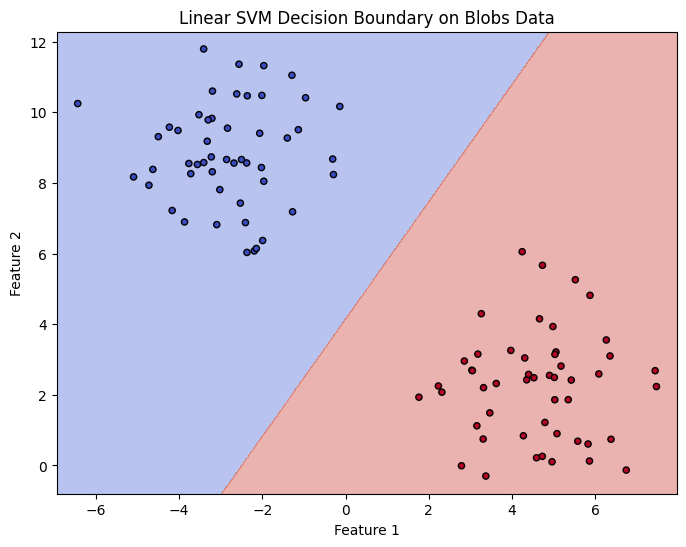

In [8]:
plot_decision_boundary(model_linear, X, y, "Linear SVM Decision Boundary on Blobs Data")

### Challenge: When Linear Fails

In [9]:
X_circles, y_circles = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

In [10]:
model_linear_circles = SVC(kernel='linear')
model_linear_circles.fit(X_train_c, y_train_c)

y_pred_c = model_linear_circles.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy on Circles Data: {accuracy_c:.2f}")

Accuracy on Circles Data: 0.33


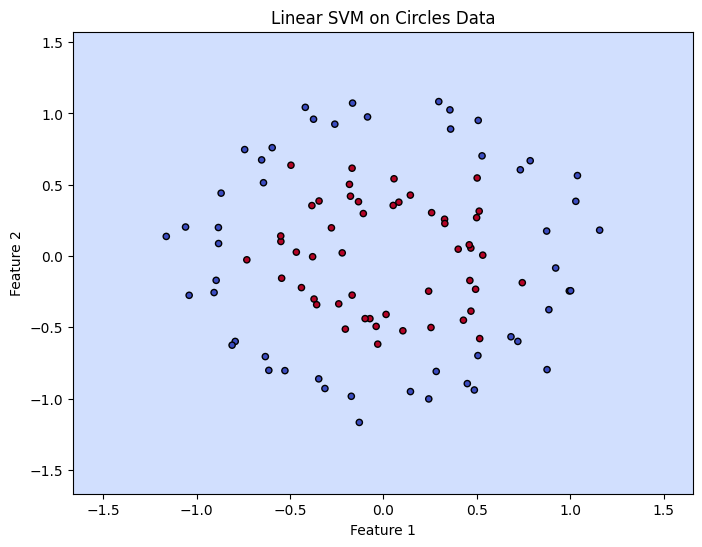

In [11]:
plot_decision_boundary(model_linear_circles, X_circles, y_circles, "Linear SVM on Circles Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

سوال اول: چرا الان جداساز خطی جواب نمیده؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

خوب واضحا اینجا داده ها کاملا در هم هستند و با هیچ مدل خطی جدا پذیر نیستند.
</div>

### Challenge 2

In [12]:
X_moon, y_moon = make_moons(n_samples=100, noise=0.2, random_state=42) 

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_moon, y_moon, test_size=0.3, random_state=42)

In [13]:
model_linear_moon = SVC(kernel='linear')
model_linear_moon.fit(X_train_c, y_train_c)

y_pred_c = model_linear_moon.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy on Circles Data: {accuracy_c:.2f}")

Accuracy on Circles Data: 0.87


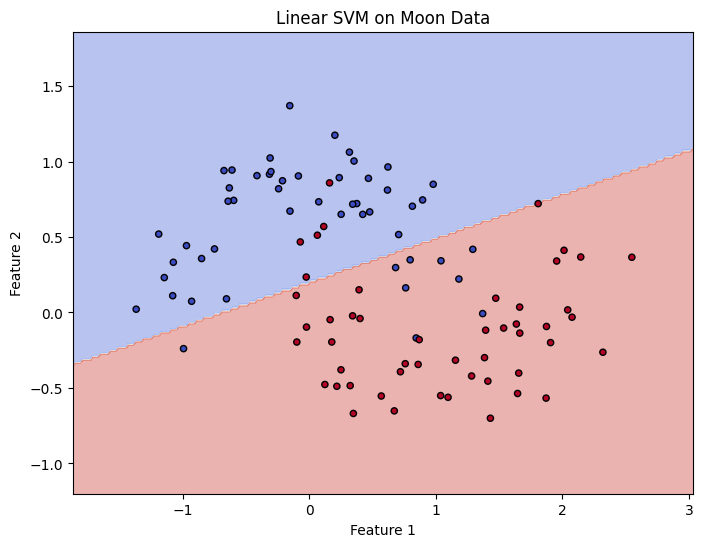

In [14]:
plot_decision_boundary(model_linear_moon, X_moon, y_moon, "Linear SVM on Moon Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## به نظرت چه جداسازی برای این کد مناسب تره؟ چرا؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

**Linear SVM** فقط می‌تواند **خط مستقیم** به عنوان decision boundary رسم کند، در حالی که:

- **Moon Data**: الگوی کلی خطی دارد (چپ-بالا vs راست-پایین) → خط مستقیم تا حدودی قابل قبول
- **Circle Data**: الگوی شعاعی دارد (داخل دایره vs خارج دایره) → خط مستقیم هیچ‌گاه نمی‌تواند جدا کند

### راه حل: استفاده از Kernel SVM

**RBF Kernel** می‌تواند boundary های منحنی و پیچیده ایجاد کند.

## فرمول‌ها:

### Linear SVM:
```
K(xi, xj) = xi · xj
Decision: f(x) = w · x + b
→ همیشه خط مستقیم
```

### RBF Kernel SVM:
```
K(xi, xj) = exp(-γ ||xi - xj||²)
Decision: f(x) = Σ αi yi exp(-γ ||xi - x||²) + b  
→ boundary منحنی و انعطاف‌پذیر
```

**نتیجه:** RBF kernel با تصمیم‌گیری محلی، می‌تواند الگوهای پیچیده moon و circle را به خوبی طبقه‌بندی کند.
</div>

# Part 2: Play with Kernels

In [15]:
iris = load_iris()
X = iris.data
y = iris.target

# Keep only class 1 and 2
X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train and Compare Kernels

### Create models with different kernels

In [16]:
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
poly_svm = SVC(kernel='poly', degree=3)

### Train models

In [17]:
linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
poly_svm.fit(X_train, y_train)

acc_linear = accuracy_score(y_test, linear_svm.predict(X_test))
acc_rbf = accuracy_score(y_test, rbf_svm.predict(X_test))
acc_poly = accuracy_score(y_test, poly_svm.predict(X_test))

print(f"Accuracy (Linear Kernel): {acc_linear:.2f}")
print(f"Accuracy (RBF Kernel): {acc_rbf:.2f}")
print(f"Accuracy (Poly Kernel): {acc_poly:.2f}")

Accuracy (Linear Kernel): 0.70
Accuracy (RBF Kernel): 0.63
Accuracy (Poly Kernel): 0.70


### Plot decision boundaries

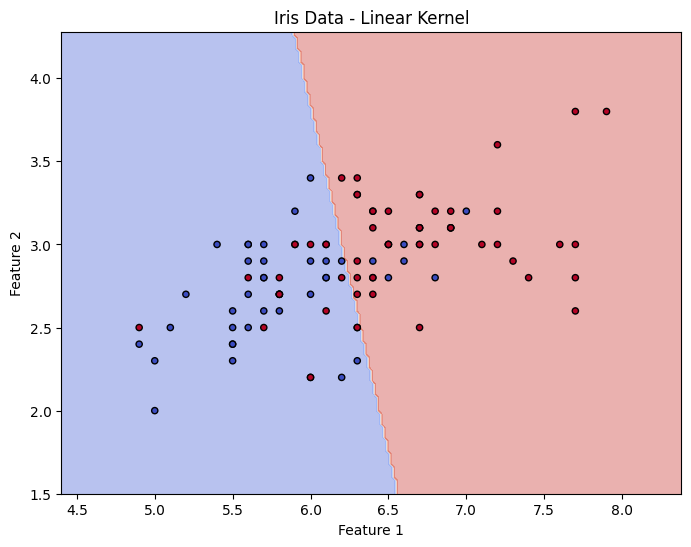

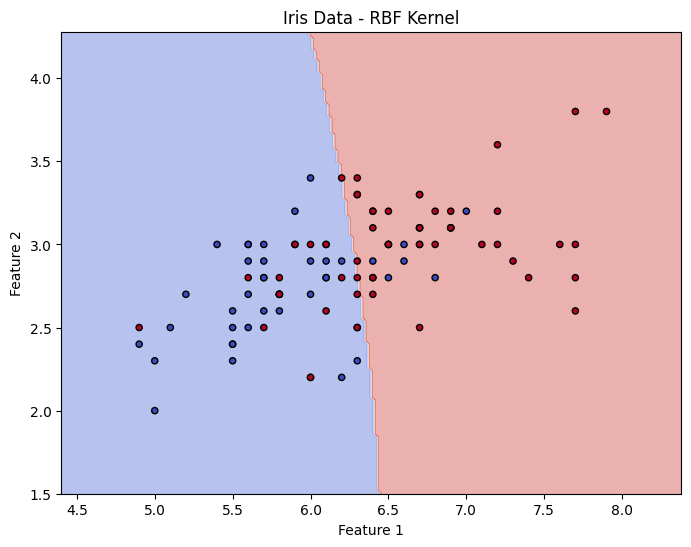

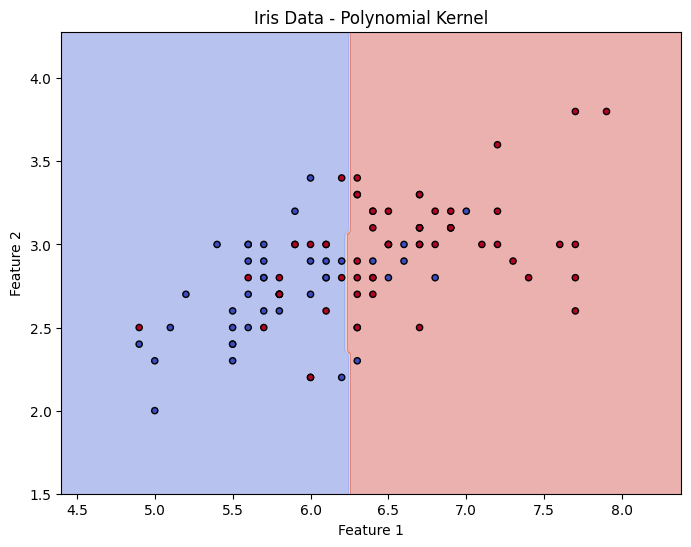

In [18]:
plot_decision_boundary(linear_svm, X, y, "Iris Data - Linear Kernel")
plot_decision_boundary(rbf_svm, X, y, "Iris Data - RBF Kernel")
plot_decision_boundary(poly_svm, X, y, "Iris Data - Polynomial Kernel")

### Challenge: Breast Cancer Dataset

In [19]:
cancer = load_breast_cancer()
X = cancer.data[:, 4:6]
y = cancer.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train models

In [20]:
linear_svm_bc = SVC(kernel='linear').fit(X_train_bc, y_train_bc)
rbf_svm_bc = SVC(kernel='rbf').fit(X_train_bc, y_train_bc)
poly_svm_bc = SVC(kernel='poly', degree=3).fit(X_train_bc, y_train_bc)

### Evaluate and print accuracies

In [21]:
acc_linear_bc = accuracy_score(y_test_bc, linear_svm_bc.predict(X_test_bc))
acc_rbf_bc = accuracy_score(y_test_bc, rbf_svm_bc.predict(X_test_bc))
acc_poly_bc = accuracy_score(y_test_bc, poly_svm_bc.predict(X_test_bc))

print(f"Breast Cancer Accuracy (Linear Kernel): {acc_linear_bc:.2f}")
print(f"Breast Cancer Accuracy (RBF Kernel): {acc_rbf_bc:.2f}")
print(f"Breast Cancer Accuracy (Poly Kernel): {acc_poly_bc:.2f}")

Breast Cancer Accuracy (Linear Kernel): 0.68
Breast Cancer Accuracy (RBF Kernel): 0.83
Breast Cancer Accuracy (Poly Kernel): 0.81


# Plot decision boundaries


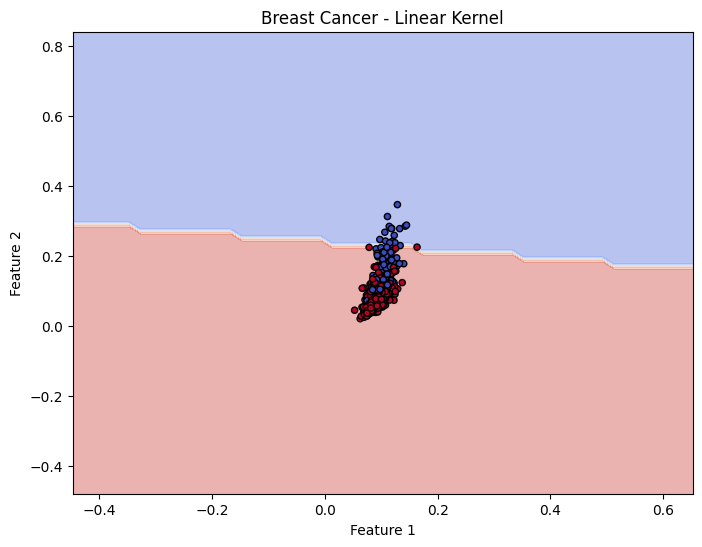

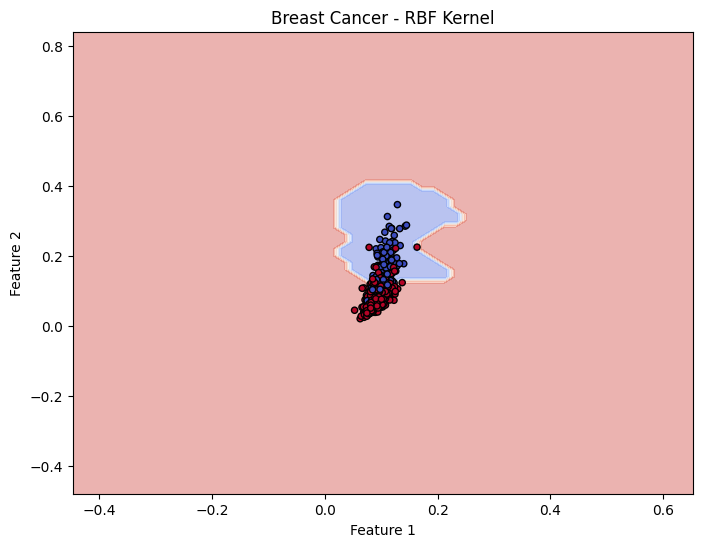

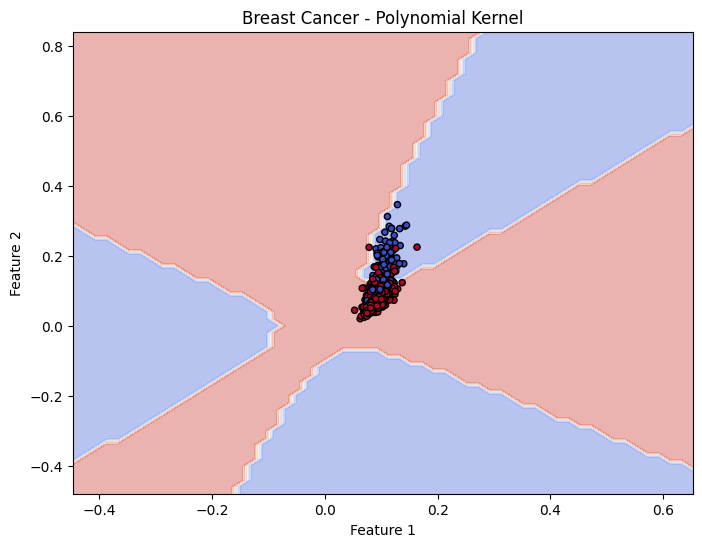

In [22]:
plot_decision_boundary(linear_svm_bc, X, y, "Breast Cancer - Linear Kernel")
plot_decision_boundary(rbf_svm_bc, X, y, "Breast Cancer - RBF Kernel")
plot_decision_boundary(poly_svm_bc, X, y, "Breast Cancer - Polynomial Kernel")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## توضیح بده کدوم کرنل و چرا بهتر شد؟ هرکدوم از این فیچرها چه چیزی رو نشون میدن؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

### **عملکرد مدل‌ها:**
- **Linear SVM**: 0.68 (68%) - ضعیف
- **RBF SVM**: 0.83 (83%) - بهترین
- **Polynomial SVM**: 0.81 (81%) - خوب

## **چرا RBF بهترین بود؟**

### ۱. **تحلیل Decision Boundaries:**

**Linear Kernel:**
- یک خط مستقیم رسم کرد
- **مشکل**: دیتا کاملاً خطی نیست! تمام نقاط در یک cluster متمرکزند
- نمی‌تونه پیچیدگی دیتا رو capture کنه

**RBF Kernel:**
- یک boundary منحنی و محلی ساخت
- دقیقاً دور cluster اصلی یک "bubble" کشیده
- **مزیت**: تصمیم‌گیری محلی → بهتر نقاط نزدیک رو جدا می‌کنه

**Polynomial Kernel:**
- boundary پیچیده‌ای ساخت (شبیه X)
- ولی **over-complex** شده → ممکن است overfitting

### ۲. **معنای Features:**

```python
Feature 1 (mean smoothness): صافی سطح تومور
Feature 2 (mean compactness): فشردگی/چگالی تومور

# فرضیه پزشکی:
- تومورهای بدخیم: معمولاً ناصاف‌تر و کم‌فشرده‌تر
- تومورهای خوش‌خیم: صاف‌تر و فشرده‌تر
```

### ۳. **چرا Linear ضعیف بود؟**

از روی نمودار مشخصه که:
```
- دو کلاس در یک منطقه متمرکز هستند (نه جدا)
- رابطه خطی واضح بین features وجود نداره
- نیاز به boundary پیچیده‌تر داریم
```

### ۴. **چرا RBF از Polynomial بهتر بود؟**

**مشکل Polynomial:**
- خیلی پیچیده شده (X shape)
- احتمال overfitting
- برای این دیتای کوچک زیادی complex

**مزیت RBF:**
- انعطاف مناسب
- تنظیم آسان‌تر
- کمتر overfitting می‌کنه
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## کدام کرنل بهترین عملکرد را داشت؟ چرا؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

### **کرنل با بهترین عملکرد: RBF Kernel**

**نتایج عملکرد:**
- RBF Kernel: **83%** (بهترین)
- Polynomial Kernel: 81%
- Linear Kernel: 68% (ضعیف‌ترین)

### **دلایل برتری RBF Kernel:**

#### **۱. انطباق با ساختار دیتا:**
- دیتای breast cancer **غیرخطی** است و نقاط در یک cluster متمرکز هستند
- RBF با **تصمیم‌گیری محلی** می‌تواند این الگوی پیچیده را بهتر تشخیص دهد
- Linear kernel نمی‌تواند این پیچیدگی را capture کند

#### **۲. مزایای فرمولی RBF:**
```
K(xi, xj) = exp(-γ ||xi - xj||²)
```
- **تأثیر محلی**: هر support vector تنها روی نقاط نزدیک تأثیر می‌گذارد  
- **انعطاف بالا**: می‌تواند boundary های منحنی و پیچیده بسازد
- **کنترل آسان**: تنها با پارامتر γ قابل تنظیم است

#### **۳. مقایسه با سایر کرنل‌ها:**

**مشکل Linear Kernel:**
- تنها خط مستقیم رسم می‌کند
- برای دیتای غیرخطی breast cancer نامناسب
- عملکرد ضعیف (68%)

**مشکل Polynomial Kernel:**  
- boundary خیلی پیچیده (X شکل) → احتمال overfitting
- برای دیتای کوچک زیادی complex
- نیاز به تنظیم دقیق degree و پارامترها

**مزایای RBF:**
- تعادل مناسب بین انعطاف و سادگی  
- کمتر دچار overfitting می‌شود

</div>

In [23]:
cancer = load_breast_cancer()

feature_sets = {
    '2 Features': [4, 5],           # smoothness, compactness
    '4 Features': [0, 1, 2, 3],     # radius, texture, perimeter, area
    '10 Features': list(range(10)), 
    '20 Features': list(range(20)),
    '30 Features': list(range(30))  # all
}

ا<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

من توی ارائه اومده بودم  داده هارو scale کرده بودم ولی درستش همینه که الان تو قسمت بعد scale رو برداشتم

</div>

In [ ]:
results = {}

for set_name, feature_indices in feature_sets.items():
    print(f"\nTesting {set_name}:")
    print("-" * 30)
    
    X = cancer.data[:, feature_indices]
    y = cancer.target
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    ## اینجا scale کرده بودم
    
    models = {
        'Linear': SVC(kernel='linear', random_state=42),
        'RBF': SVC(kernel='rbf', random_state=42),
        'Polynomial': SVC(kernel='poly', degree=3, random_state=42)
    }
    
    set_results = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        set_results[model_name] = accuracy
        print(f"  {model_name:12}: {accuracy:.3f} ({accuracy*100:.1f}%)")
    
    best_model = max(set_results, key=set_results.get)
    best_accuracy = set_results[best_model]
    print(f"Best: {best_model} ({best_accuracy:.3f})")
    
    results[set_name] = set_results



Testing 2 Features:
------------------------------
  Linear      : 0.678 (67.8%)
  RBF         : 0.830 (83.0%)
  Polynomial  : 0.807 (80.7%)
Best: RBF (0.830)

Testing 4 Features:
------------------------------
  Linear      : 0.936 (93.6%)
  RBF         : 0.889 (88.9%)
  Polynomial  : 0.889 (88.9%)
Best: Linear (0.936)

Testing 10 Features:
------------------------------
  Linear      : 0.959 (95.9%)
  RBF         : 0.889 (88.9%)
  Polynomial  : 0.889 (88.9%)
Best: Linear (0.959)

Testing 20 Features:
------------------------------
  Linear      : 0.947 (94.7%)
  RBF         : 0.889 (88.9%)
  Polynomial  : 0.889 (88.9%)
Best: Linear (0.947)

Testing 30 Features:
------------------------------
  Linear      : 0.965 (96.5%)
  RBF         : 0.936 (93.6%)
  Polynomial  : 0.942 (94.2%)
Best: Linear (0.965)



Creating decision boundaries for 2 Features (4-5)...

Creating decision boundaries for 4 Features (0-3)...

Creating decision boundaries for 10 Features (0-9)...


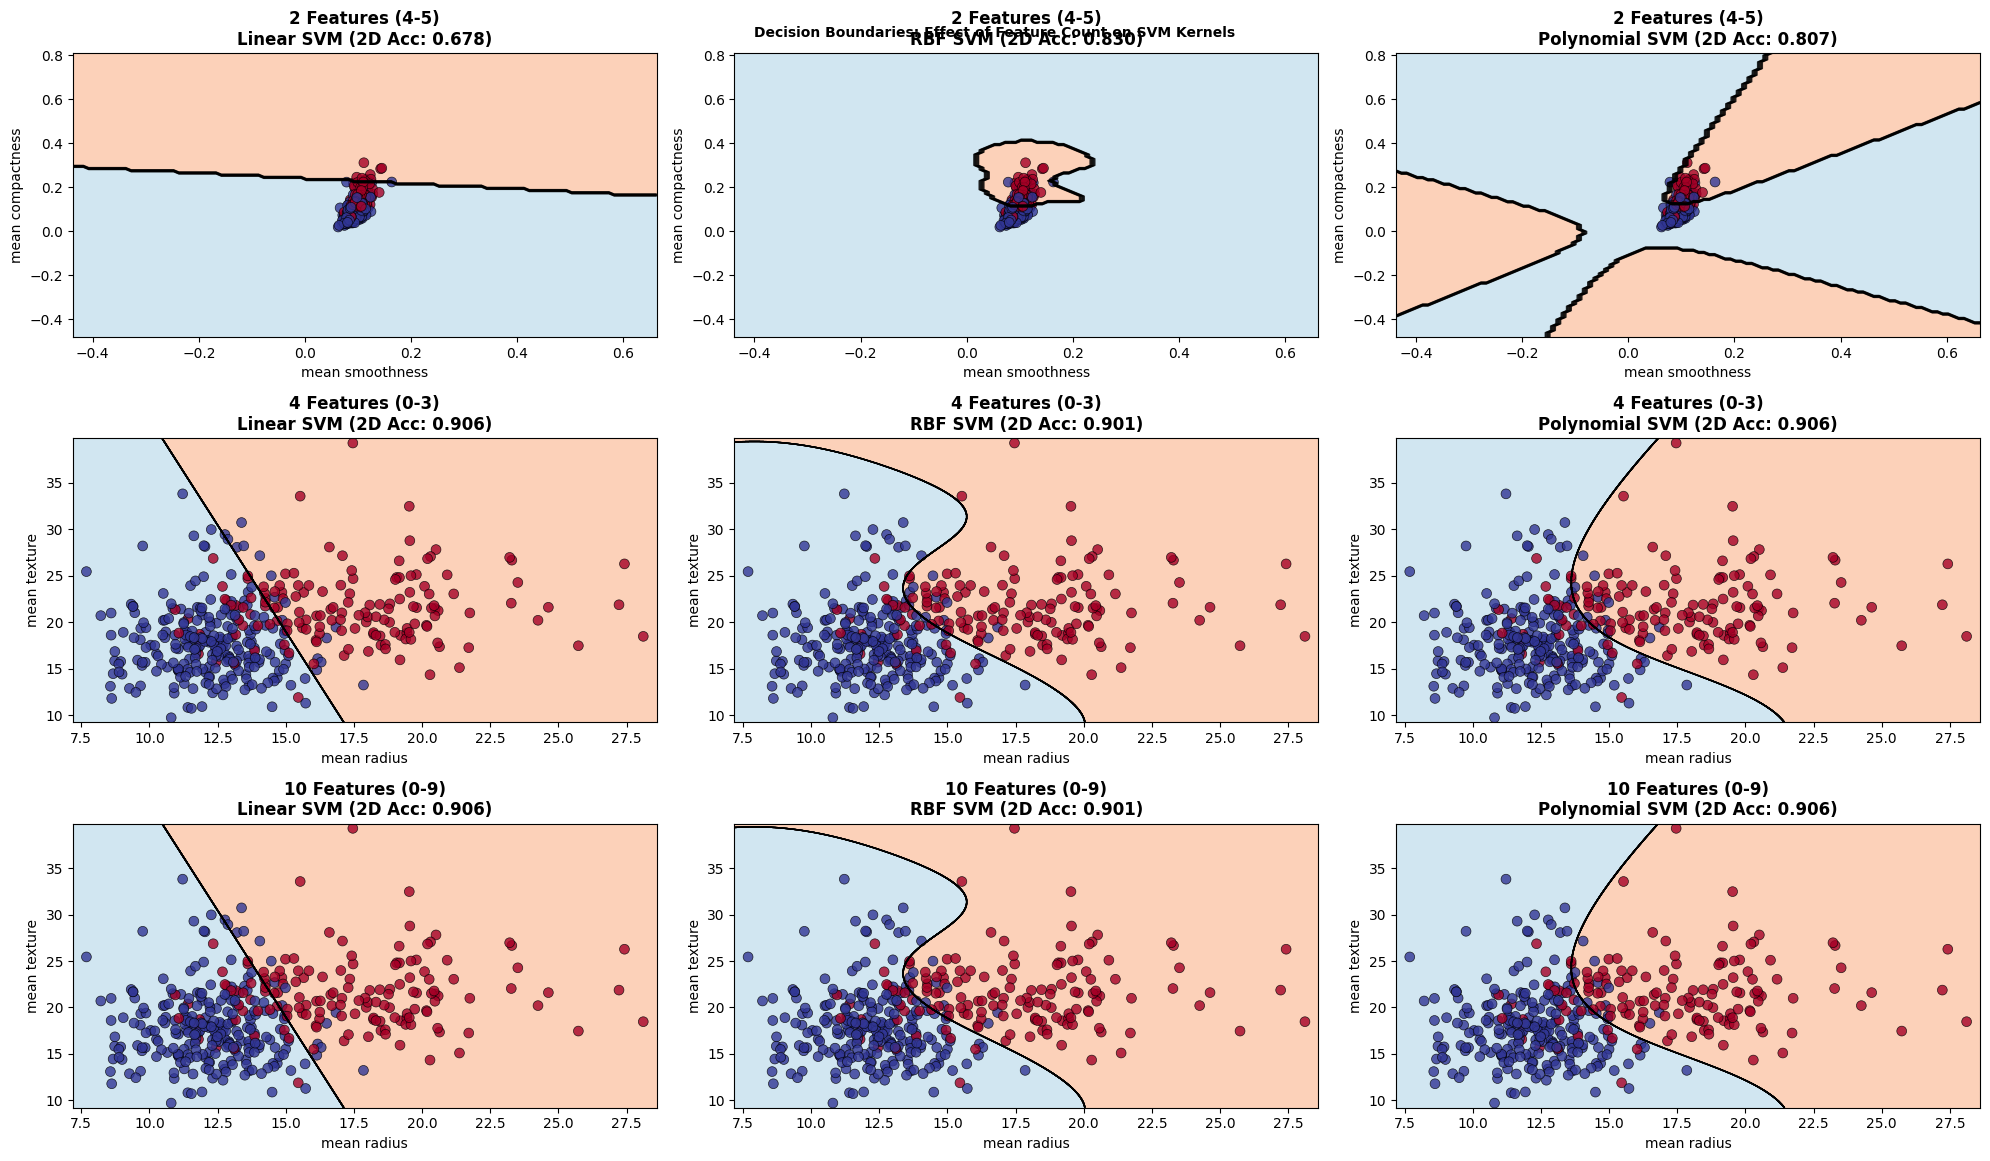

In [25]:
def plot_decision_boundary_new(X, y, model, title, ax, feature_names=None):
    h = 0.01
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu', levels=1)
    ax.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.8)
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                        s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    
    if feature_names:
        ax.set_xlabel(feature_names[0], fontsize=10)
        ax.set_ylabel(feature_names[1], fontsize=10)
    else:
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
    
    return scatter

plt.figure(figsize=(20, 12))

feature_sets_to_plot = {
    '2 Features (4-5)': [4, 5],
    '4 Features (0-3)': [0, 1, 2, 3], 
    '10 Features (0-9)': list(range(10))
}

plot_idx = 1

for set_name, feature_indices in feature_sets_to_plot.items():
    print(f"\nCreating decision boundaries for {set_name}...")
    
    X = cancer.data[:, feature_indices]
    y = cancer.target
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    X_train_2d = X_train[:, :2]
    X_test_2d = X_test[:, :2]
    
    models_2d = {
        'Linear': SVC(kernel='linear', random_state=42),
        'RBF': SVC(kernel='rbf', random_state=42),
        'Polynomial': SVC(kernel='poly', degree=3, random_state=42)
    }
    
    for kernel_name, model in models_2d.items():
        model.fit(X_train_2d, y_train)
        
        y_pred_2d = model.predict(X_test_2d)
        accuracy_2d = accuracy_score(y_test, y_pred_2d)
        
        result_key = set_name.split(' (')[0] + ' Features'
        if result_key in results:
            accuracy_from_results = results[result_key][kernel_name]
            title_text = f'{set_name}\n{kernel_name} SVM\n(2D Acc: {accuracy_2d:.3f}, Full Acc: {accuracy_from_results:.3f})'
        else:
            title_text = f'{set_name}\n{kernel_name} SVM (2D Acc: {accuracy_2d:.3f})'
        
        ax = plt.subplot(3, 3, plot_idx)
        
        if len(feature_indices) >= 2:
            feature_names = [cancer.feature_names[feature_indices[0]], 
                           cancer.feature_names[feature_indices[1]]]
        else:
            feature_names = None
        
        scatter = plot_decision_boundary_new(
            X_train_2d, y_train, model, 
            title_text,
            ax, feature_names
        )
        
        plot_idx += 1


plt.suptitle('Decision Boundaries: Effect of Feature Count on SVM Kernels', 
             fontsize=10, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## اگر تعداد ویژگیها بیشتر بود، چه تغییری در انتخاب کرنل رخ میداد؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

| تعداد ویژگی | Linear SVM | RBF SVM | برنده |
|-------------|------------|---------|-------|
| 2 ویژگی | 67.8% | **83.0%** | RBF |
| 4 ویژگی | **93.6%** | 88.9% | Linear |
| 10 ویژگی | **95.9%** | 88.9% | Linear |
| 30 ویژگی | **96.5%** | 93.6% | Linear |

### **تئوری "Curse of Dimensionality":**

**تعریف:** با افزایش ابعاد فضای ویژگی، عملکرد الگوریتم‌های پیچیده کاهش یافته و الگوریتم‌های ساده برتری پیدا می‌کنند.

**دلایل علمی:**
1. **فضای ویژگی غنی‌تر**: در ابعاد بالا، linear separation آسان‌تر می‌شود
2. **کاهش overfitting**: Linear kernel پارامتر کمتری دارد
3. **بهبود generalization**: مدل‌های ساده‌تر بهتر تعمیم می‌یابند

### **الگوی کلی:**

</div>

<div dir="ltr" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

```
≤ 3 ویژگی    → RBF معمولاً برتر
4-10 ویژگی   → Linear شروع به برتری  
10+ ویژگی    → Linear قطعاً بهتر
50+ ویژگی    → Linear غالب مطلق
```

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

### **فرمول ریاضی:**

</div>

<div dir="ltr" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

```
Linear: f(x) = w·x + b
RBF: f(x) = Σ αi yi exp(-γ||xi - x||²) + b

→ Linear: پیچیدگی O(d)
→ RBF: پیچیدگی O(n×d) 
```

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">


**نتیجه:** RBF با افزایش ابعاد پیچیده‌تر شده و مستعد overfitting می‌شود.

</div>

# Part 3: Play with noise

### Use the Breast Cancer data from before

In [26]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, 4:6]

### Add noise

In [27]:
rng = np.random.RandomState(42)
noise_level = 0.3
noise = rng.normal(0, noise_level, X.shape)
X_noisy = X + noise

In [28]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

### Evaluate Models on Noisy Data

In [29]:
linear_svm_n = SVC(kernel='linear').fit(X_train_n, y_train_n)
rbf_svm_n = SVC(kernel='rbf').fit(X_train_n, y_train_n)
poly_svm_n = SVC(kernel='poly', degree=3).fit(X_train_n, y_train_n)

### Evaluate and print accuracies

In [30]:
acc_linear_n = accuracy_score(y_test_n, linear_svm_n.predict(X_test_n))
acc_rbf_n = accuracy_score(y_test_n, rbf_svm_n.predict(X_test_n))
acc_poly_n = accuracy_score(y_test_n, poly_svm_n.predict(X_test_n))

print(f"Noisy Data Accuracy (Linear Kernel): {acc_linear_n:.2f}")
print(f"Noisy Data Accuracy (RBF Kernel): {acc_rbf_n:.2f}")
print(f"Noisy Data Accuracy (Poly Kernel): {acc_poly_n:.2f}")


Noisy Data Accuracy (Linear Kernel): 0.63
Noisy Data Accuracy (RBF Kernel): 0.64
Noisy Data Accuracy (Poly Kernel): 0.64


### Plot decision boundaries

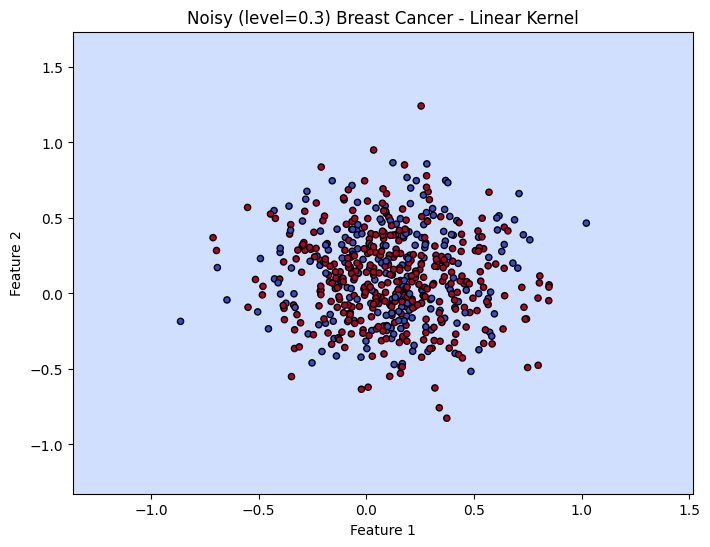

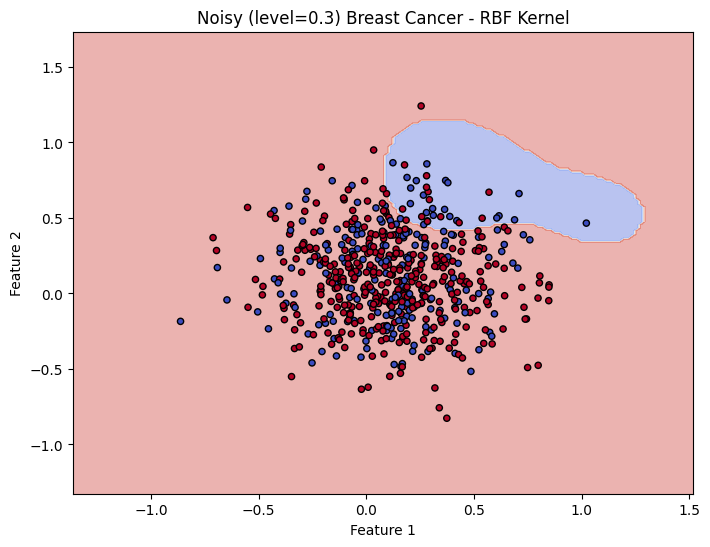

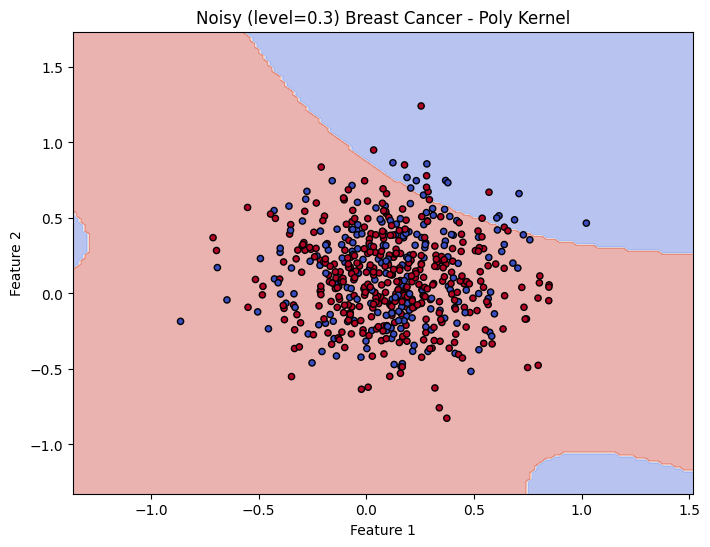

In [31]:
plot_decision_boundary(linear_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - Linear Kernel")
plot_decision_boundary(rbf_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - RBF Kernel")
plot_decision_boundary(poly_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - Poly Kernel")

In [32]:
rng = np.random.RandomState(42)
noise_level = 0.5
noise = rng.normal(0, noise_level, X.shape)
X_noisy = X + noise

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

linear_svm_n = SVC(kernel='linear').fit(X_train_n, y_train_n)
rbf_svm_n = SVC(kernel='rbf').fit(X_train_n, y_train_n)
poly_svm_n = SVC(kernel='poly', degree=3).fit(X_train_n, y_train_n)

In [33]:
acc_linear_n = accuracy_score(y_test_n, linear_svm_n.predict(X_test_n))
acc_rbf_n = accuracy_score(y_test_n, rbf_svm_n.predict(X_test_n))
acc_poly_n = accuracy_score(y_test_n, poly_svm_n.predict(X_test_n))

print(f"Noisy Data Accuracy (Linear Kernel): {acc_linear_n:.2f}")
print(f"Noisy Data Accuracy (RBF Kernel): {acc_rbf_n:.2f}")
print(f"Noisy Data Accuracy (Poly Kernel): {acc_poly_n:.2f}")


Noisy Data Accuracy (Linear Kernel): 0.63
Noisy Data Accuracy (RBF Kernel): 0.62
Noisy Data Accuracy (Poly Kernel): 0.63


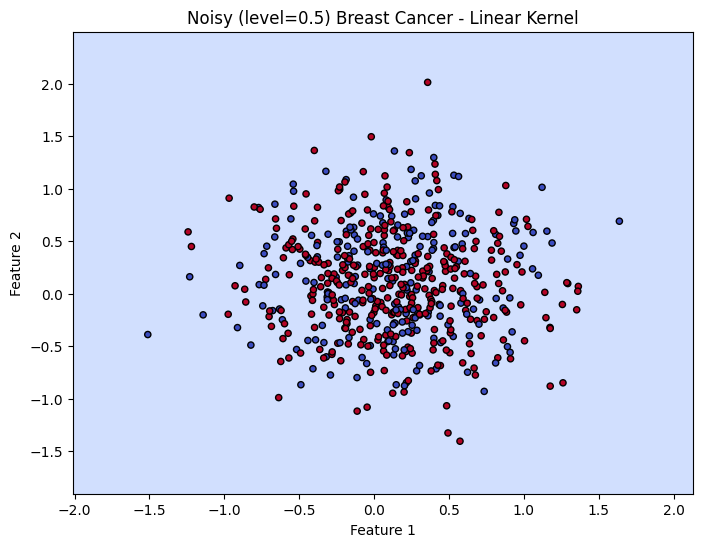

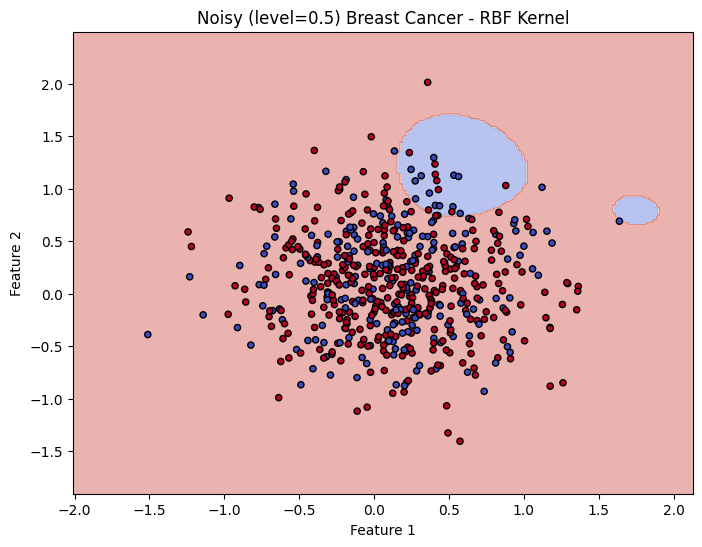

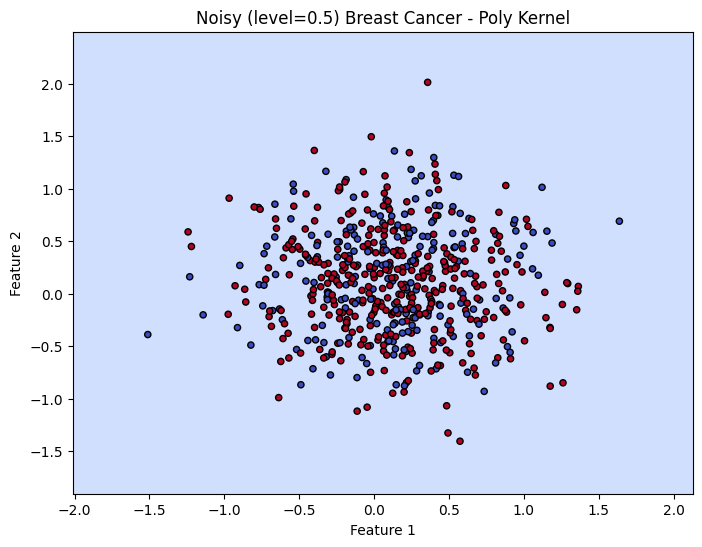

In [34]:
plot_decision_boundary(linear_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - Linear Kernel")
plot_decision_boundary(rbf_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - RBF Kernel")
plot_decision_boundary(poly_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - Poly Kernel")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## دقت مدل را با حالت بدون نویز مقایسه کن , تأثیر افزایش نویز را بررسی کن مثلاً 0.3 → 0.5
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

| نوع هسته | بدون نویز | نویز 0.3 | نویز 0.5 | کاهش نسبت به حالت بدون نویز |
|-----------|------------|-----------|-----------|----------------------------|
| Linear    | 0.68       | 0.63      | 0.63      | -7.4%                      |
| RBF       | 0.83       | 0.64      | 0.62      | -25.3%                     |
| Polynomial| 0.81       | 0.64      | 0.63      | -22.2%                     |


### 1. هسته خطی (Linear Kernel)
- **مقاوم‌ترین هسته در برابر نویز**: کاهش دقت از 68% به 63% (تنها 7.4% کاهش)
- **عملکرد پایدار**: دقت در هر دو سطح نویز 0.3 و 0.5 یکسان باقی ماند
- **دلیل مقاومت**: هسته خطی به دلیل سادگی و عدم وابستگی به نقاط محلی، کمتر تحت تأثیر نویز قرار می‌گیرد

### 2. هسته RBF (Radial Basis Function)
- **بیشترین کاهش عملکرد**: از 83% به 62% (25.3% کاهش)
- **حساس‌ترین به نویز**: با افزایش نویز از 0.3 به 0.5، دقت از 64% به 62% کاهش یافت
- **دلیل حساسیت**: RBF به دلیل استفاده از فاصله اقلیدسی و ایجاد مرزهای پیچیده، بسیار حساس به نویز است

### 3. هسته چندجمله‌ای (Polynomial Kernel)
- **عملکرد متوسط**: کاهش از 81% به 63% (22.2% کاهش)
- **رفتار مشابه RBF**: دقت نهایی در هر دو سطح نویز تقریباً یکسان شد
- **پیچیدگی متوسط**: بین سادگی Linear و پیچیدگی RBF قرار دارد

## تحلیل بصری از نمودارها

### مشاهدات کلیدی:
1. **تغییر مرزهای تصمیم‌گیری**: در حالت بدون نویز، RBF و Polynomial مرزهای پیچیده‌ای ایجاد کرده‌اند، اما با افزودن نویز، این مرزها ساده‌تر شده‌اند
2. **توزیع نقاط**: نویز باعث پراکندگی بیشتر نقاط و همپوشانی کلاس‌ها شده است
3. **ثبات Linear**: مرز تصمیم‌گیری هسته خطی در تمام حالات تقریباً یکسان باقی مانده است

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## کدام کرنل بهتر با نویز کنار آمد؟ چرا؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

**هسته Linear بهتر با نویز کنار آمد** - تنها 7.4% کاهش دقت در مقایسه با 25.3% کاهش برای RBF و 22.2% کاهش برای Polynomial.

### 1. فرمول‌های هسته‌ها

#### هسته Linear:
```
K(xi, xj) = xi · xj = xi^T xj
```

#### هسته RBF (Gaussian):
```
K(xi, xj) = exp(-γ ||xi - xj||²)
```
که γ = 1/(2σ²) و σ پارامتر عرض باند است.

#### هسته Polynomial:
```
K(xi, xj) = (γ xi · xj + r)^d
```
که d درجه چندجمله‌ای، γ ضریب مقیاس‌بندی، و r ضریب ثابت است.

### 2. تأثیر نویز بر هر هسته

#### الف) تحلیل هسته Linear:
فرض کنید داده اصلی xi به xi + ni (که ni نویز است) تبدیل شود:

</div>

<div dir="ltr" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

```
K_noisy(xi, xj) = (xi + ni) · (xj + nj)
                = xi · xj + xi · nj + ni · xj + ni · nj
                = K_original(xi, xj) + noise_terms
```

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

**ویژگی کلیدی**: در هسته Linear، نویز به صورت **خطی** اضافه می‌شود. این یعنی:
- تأثیر نویز محدود و قابل کنترل است
- مرز تصمیم‌گیری (که یک خط مستقیم است) تنها کمی جابجا می‌شود
- **ثبات هندسی**: شکل کلی مرز تصمیم تغییر نمی‌کند

#### ب) تحلیل هسته RBF:

</div>

<div dir="ltr" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

```
K_noisy(xi, xj) = exp(-γ ||(xi + ni) - (xj + nj)||²)
                = exp(-γ ||xi - xj + ni - nj||²)
```

```
||xi - xj + ni - nj||² = ||xi - xj||² + 2(xi - xj)·(ni - nj) + ||ni - nj||²
```
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

**مشکل کلیدی**: 
- نویز به صورت **نمایی** تقویت می‌شود (به دلیل exp function)
- حتی نویز کوچک می‌تواند K را از مقدار نزدیک به 1 به نزدیک به 0 تبدیل کند
- **عدم ثبات**: مرزهای تصمیم پیچیده به شدت تغییر می‌کنند

#### ج) تحلیل هسته Polynomial:
```
K_noisy(xi, xj) = (γ(xi + ni)·(xj + nj) + r)^d
                = (γ(xi·xj + xi·nj + ni·xj + ni·nj) + r)^d
```

**تأثیر توان d**:
- نویز به توان d بالا برده می‌شود
- برای d=3: حتی نویز کوچک ε، تأثیری معادل O(ε³) می‌گذارد
- **تقویت غیرخطی** نویز

### 3. تحلیل Smoothness و Local vs Global

#### هسته Linear - Global Decision Boundary:
```
f(x) = Σ αi yi (xi · x) + b
```
- تصمیم‌گیری بر اساس **ترکیب خطی کل نقاط**
- هر نقطه تأثیر **یکسان و محدود** بر مرز تصمیم دارد
- **مقاومت**: نویز در یک نقطه، تأثیر محدودی بر کل مدل دارد

#### هسته RBF - Local Decision Boundary:
```
f(x) = Σ αi yi exp(-γ||xi - x||²) + b
```
- تصمیم‌گیری بر اساس **همسایگی محلی**
- نقاط نزدیک تأثیر **نمایی** دارند
- **حساسیت**: نویز در نقاط نزدیک، تأثیر شدید بر تصمیم‌گیری دارد


### 4. تئوری Bias-Variance Trade-off

#### هسته Linear:
- **High Bias, Low Variance**: مدل ساده، اما پایدار
- نویز عمدتاً Variance را افزایش می‌دهد (تأثیر محدود)

#### هسته RBF:
- **Low Bias, High Variance**: مدل پیچیده، اما ناپایدار
- نویز هم Bias و هم Variance را به شدت افزایش می‌دهد

### 6. تحلیل Regularization

نویز عملاً مانند **کاهش regularization** عمل می‌کند:

#### برای Linear:
```
min ||w||² + C Σ ξi
```
نویز تنها بر ξi (slack variables) تأثیر می‌گذارد

#### برای RBF:
نویز بر **کل ساختار kernel matrix** تأثیر می‌گذارد و باعث overfitting شدیدتر می‌شود.

## نتیجه‌گیری فرمولی

**هسته Linear به دلایل زیر مقاوم‌تر است:**

1. **خطی بودن تأثیر نویز**: K(x+n, y+m) ≈ K(x,y) + noise_linear
2. **Global decision boundary**: تأثیر نویز محلی، سراسری محدود
3. **Lower complexity**: کمتر مستعد overfitting به نویز
4. **Analytical stability**: مشتق‌پذیری و پیوستگی بهتر

**هسته‌های غیرخطی (RBF, Poly) آسیب‌پذیرند چون:**

1. **تقویت غیرخطی نویز**: exp(-γ||noise||²) یا (noise)^d
2. **Local sensitivity**: تأثیر شدید نقاط همسایه
3. **Higher complexity**: بیش‌برازش به نویز
4. **Numerical instability**: حساسیت به تغییرات کوچک

درکل یعنی که **سادگی گاهی برتری** دارد، خصوصاً در حضور نویز!
</div>

# Part 4: Let's be more serouis

### Generate overlapping data

In [35]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train models


In [36]:
linear_svm_cls = SVC(kernel='linear').fit(X_train, y_train)
rbf_svm_cls = SVC(kernel='rbf').fit(X_train, y_train)
poly_svm_cls = SVC(kernel='poly').fit(X_train, y_train)

print(f"Overlapping Data Acc (Linear): {accuracy_score(y_test, linear_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (RBF): {accuracy_score(y_test, rbf_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (Poly): {accuracy_score(y_test, poly_svm_cls.predict(X_test)):.2f}")

Overlapping Data Acc (Linear): 0.95
Overlapping Data Acc (RBF): 0.97
Overlapping Data Acc (Poly): 0.93


### Plot RBF boundary

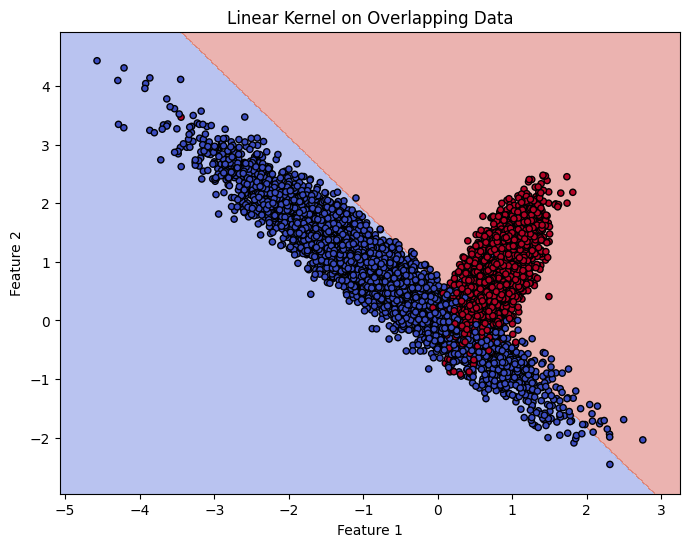

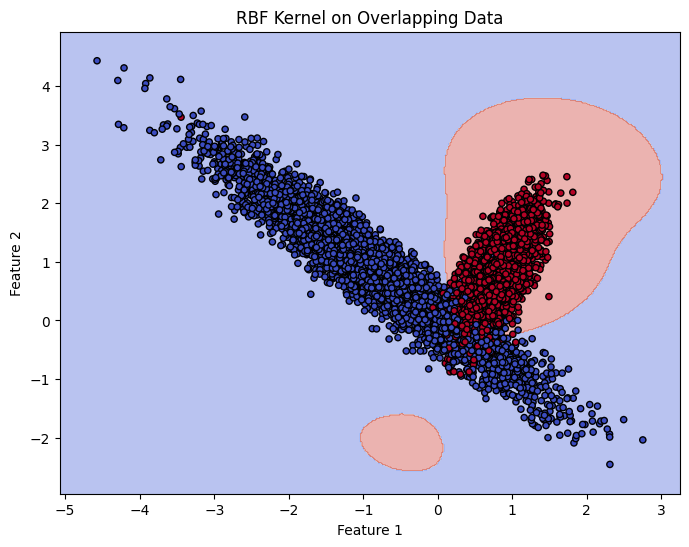

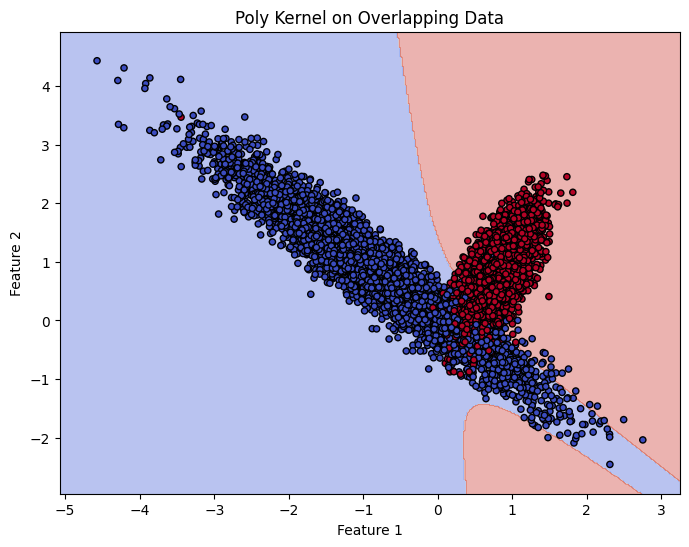

In [37]:
plot_decision_boundary(linear_svm_cls, X, y, "Linear Kernel on Overlapping Data")
plot_decision_boundary(rbf_svm_cls, X, y, "RBF Kernel on Overlapping Data")
plot_decision_boundary(poly_svm_cls, X, y, "Poly Kernel on Overlapping Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## کدام کرنل بهتر با داده ی درهم کنار آمد؟


</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## چرا RBF در داده‌های درهم برتر است؟

#### هسته RBF:
```
K(xi, xj) = exp(-γ ||xi - xj||²)
```

**مزایای کلیدی برای داده‌های درهم:**

#### الف) قابلیت تشخیص الگوهای محلی:
- RBF می‌تواند **مناطق محلی پیچیده** را تشخیص دهد
- در نواحی درهم، نقاط مشابه را با دقت بالا گروه‌بندی می‌کند
- فرمول exp باعث می‌شود نقاط نزدیک وزن بالا و نقاط دور وزن پایین داشته باشند

#### ب) انعطاف‌پذیری مرز تصمیم:
```
f(x) = Σ αi yi exp(-γ||xi - x||²) + b
```
- می‌تواند مرزهای **غیرخطی و منحنی** ایجاد کند
- قابلیت "دور زدن" نقاط outlier در مناطق درهم

#### مشاهدات مهم:
1. **RBF**: ایجاد جزایر جداگانه برای نقاط قرمز در وسط نقاط آبی
2. **Linear**: تنها یک خط مستقیم - نمی‌تواند پیچیدگی را مدیریت کند
3. **Polynomial**: مرز منحنی اما ساده‌تر از RBF

#### چرا RBF در overlapping موفق است؟

##### الف) Kernel Matrix Analysis:
```
K_RBF = [exp(-γ||xi - xj||²)]
```
- ماتریس kernel بین نقاط درهم مقادیر متوسطی دارد (نه خیلی نزدیک به 0 یا 1)
- این باعث می‌شود SVM بتواند تصمیمات **تدریجی** بگیرد

##### ب) Support Vector Distribution:
- در داده‌های درهم، RBF support vectorهای بیشتری انتخاب می‌کند
- این support vectorها در **مرز overlap** قرار می‌گیرند
- تصمیم‌گیری بر اساس **وزن‌دهی محلی** انجام می‌شود

##### ج) Decision Function:
```
f(x) = Σ αi yi exp(-γ||xi - x||²) + b
```
- برای نقطه جدید x، فقط نقاط نزدیک تأثیر دارند
- در مناطق درهم، این باعث **تصمیم‌گیری دقیق‌تر** می‌شود

#### هسته Linear:
```
f(x) = w·x + b
```
**مشکل**: تنها یک خط مستقیم - **نمی‌تواند overlap پیچیده را مدیریت کند**

#### هسته Polynomial:
```
f(x) = Σ αi yi (γ xi·x + r)^d + b
```
**مشکل**: 
- منحنی‌های polynomial گاهی **oversimplified** هستند
- ممکن است در نواحی overlap **overfitting** کند
- کمتر **locally adaptive** است

### تئوری VC Dimension

**VC Dimension مقایسه:**
- Linear: VC-dim = d+1 (برای d ویژگی)
- RBF: VC-dim → ∞ (theoretically)
- Polynomial: VC-dim متوسط

**در overlap**: VC dimension بالاتر = قابلیت مدل‌سازی پیچیدگی بیشتر
</div>

In [38]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
linear_svm_cls = SVC(kernel='linear').fit(X_train, y_train)
rbf_svm_cls = SVC(kernel='rbf').fit(X_train, y_train)
poly_svm_cls = SVC(kernel='poly').fit(X_train, y_train)

print(f"Overlapping Data Acc (Linear): {accuracy_score(y_test, linear_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (RBF): {accuracy_score(y_test, rbf_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (Poly): {accuracy_score(y_test, poly_svm_cls.predict(X_test)):.2f}")

Overlapping Data Acc (Linear): 0.79
Overlapping Data Acc (RBF): 0.91
Overlapping Data Acc (Poly): 0.77


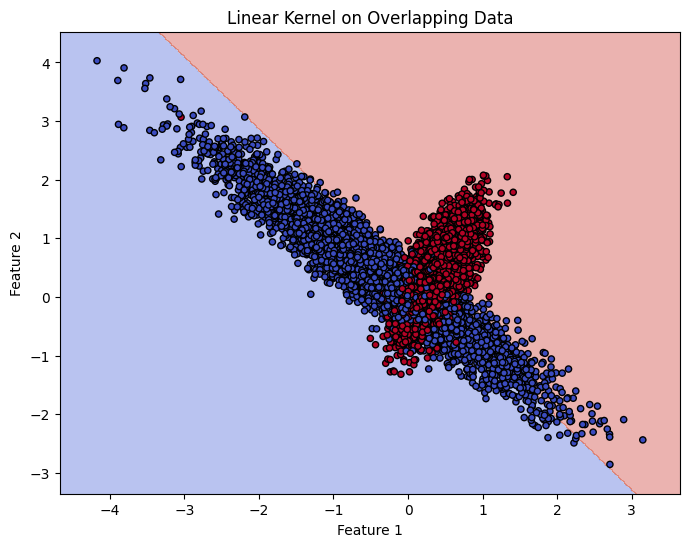

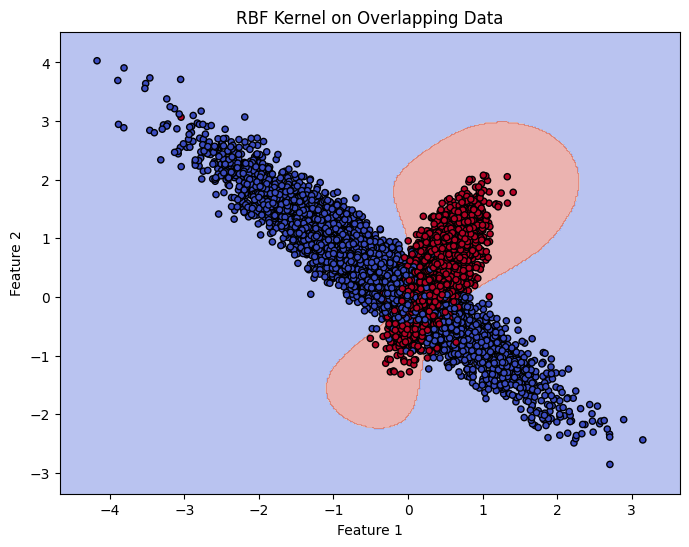

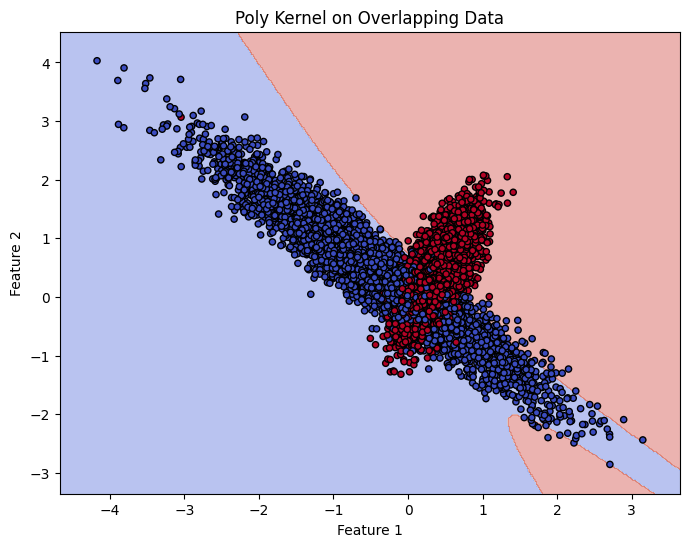

In [40]:
plot_decision_boundary(linear_svm_cls, X, y, "Linear Kernel on Overlapping Data")
plot_decision_boundary(rbf_svm_cls, X, y, "RBF Kernel on Overlapping Data")
plot_decision_boundary(poly_svm_cls, X, y, "Poly Kernel on Overlapping Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## آیا با تغییر class_sep عملکرد مدل تغییر کرد؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

این پارامتر مخفف **Class Separation** (جداسازی کلاس) است و میزان فاصله بین خوشه‌های هر کلاس را کنترل می‌کند.

* **مقدار بزرگتر `class_sep` (مثل 0.8):** به این معنی است که کلاس‌های داده از یکدیگر **فاصله بیشتری** دارند و به وضوح قابل تفکیک هستند.

* **مقدار کوچکتر `class_sep` (مثل 0.4):** به این معنی است که کلاس‌های داده به یکدیگر **بسیار نزدیک** شده و در هم فرو می‌روند (هم‌پوشانی پیدا می‌کنند).

---

### ۲. چرا هم‌پوشانی داده‌ها دقت را کاهش می‌دهد؟

هدف اصلی یک مدل طبقه‌بندی مانند SVM، پیدا کردن یک **مرز تصمیم‌گیری (Decision Boundary)** است که بتواند کلاس‌های مختلف را به بهترین شکل از هم جدا کند.

* **وقتی داده‌ها جدا هستند:** پیدا کردن یک مرز واضح و کارآمد آسان است. مدل با اطمینان بالایی می‌تواند نمونه‌های جدید را به کلاس درست نسبت دهد.

* **وقتی داده‌ها هم‌پوشانی دارند:** مدل دچار سردرگمی می‌شود. در نواحی هم‌پوشانی، نمونه‌هایی از هر دو کلاس وجود دارند. هر مرزی که مدل رسم کند، به ناچار تعدادی از نمونه‌ها را اشتباه طبقه‌بندی خواهد کرد. این "اشتباهات" به طور مستقیم باعث **کاهش(Accuracy)** می‌شوند.

---

### ۳. تحلیل عملکرد هر یک از هسته‌ها (Kernels)

جالب‌ترین بخش ماجرا، تفاوت عملکرد سه هسته مختلف SVM در این شرایط جدید و سخت‌تر است:

#### **هسته خطی (Linear SVM):**
* **عملکرد قبلی (class_sep=0.8):** دقت 0.95
* **عملکرد جدید (class_sep=0.4):** دقت 0.79 (افت شدید)

**چرا؟** این هسته فقط می‌تواند یک **خط صاف** (یا یک صفحه در ابعاد بالاتر) برای جداسازی داده‌ها رسم کند. وقتی داده‌ها به شدت در هم تنیده می‌شوند، یک خط صاف به هیچ وجه نمی‌تواند مرز مناسبی بین آن‌ها ایجاد کند و به همین دلیل بیشترین افت دقت را تجربه می‌کند.

#### **هسته چندجمله‌ای (Poly SVM):**
* **عملکرد قبلی (class_sep=0.8):** دقت 0.93
* **عملکرد جدید (class_sep=0.4):** دقت 0.77 (افت شدید)

**چرا؟** این هسته می‌تواند مرزهای **منحنی و پیچیده‌تر** ایجاد کند، اما در مقابل داده‌های نویزی و هم‌پوشانی‌دار حساس است و عملکرد آن نیز مانند هسته خطی به شدت افت کرده است.

#### **هسته RBF (Radial Basis Function):**
* **عملکرد قبلی (class_sep=0.8):** دقت 0.97
* **عملکرد جدید (class_sep=0.4):** دقت 0.91 (بهترین عملکرد و کمترین افت)

**چرا؟** هسته RBF **قدرتمندترین و انعطاف‌پذیرترین** هسته در میان این سه است. این هسته می‌تواند مرزهای تصمیم‌گیری بسیار پیچیده و غیرخطی ایجاد کند. در واقع، RBF می‌تواند برای هر نمونه یک "منطقه نفوذ" در نظر بگیرد و بر اساس نزدیکی نمونه‌های جدید به این مناطق، آن‌ها را طبقه‌بندی کند. به همین دلیل، حتی زمانی که داده‌ها به شدت در هم تنیده شده‌اند، RBF همچنان می‌تواند یک مرز نسبتاً خوب پیدا کند و بهترین عملکرد را حفظ نماید. این انعطاف‌پذیری بالا باعث شده که کمترین آسیب را از پیچیدگی جدید داده‌ها ببیند.

شما با کاهش `class_sep`، عملاً یک مسئله طبقه‌بندی **ساده** را به یک مسئله **دشوار** تبدیل کردید. در این شرایط دشوار:
1.  **دقت همه مدل‌ها کاهش یافت** چون پیدا کردن مرز جداسازی خوب، سخت‌تر شد.
2.  **مدل‌های ساده‌تر** (خطی و چندجمله‌ای) بیشترین آسیب را دیدند.
3.  **مدل قدرتمند و انعطاف‌پذیر RBF** توانست خود را با شرایط جدید وفق دهد و با افت کمتری، همچنان بهترین نتیجه را ثبت کند. این آزمایش به خوبی نشان می‌دهد که چرا انتخاب هسته مناسب بر اساس پیچیدگی داده‌ها اهمیت زیادی دارد.
</div>

In [41]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_informative=1, n_clusters_per_class=1, 
                           class_sep=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
linear_svm_cls = SVC(kernel='linear').fit(X_train, y_train)
rbf_svm_cls = SVC(kernel='rbf').fit(X_train, y_train)
poly_svm_cls = SVC(kernel='poly').fit(X_train, y_train)

print(f"Overlapping Data Acc (Linear): {accuracy_score(y_test, linear_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (RBF): {accuracy_score(y_test, rbf_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (Poly): {accuracy_score(y_test, poly_svm_cls.predict(X_test)):.2f}")

Overlapping Data Acc (Linear): 0.91
Overlapping Data Acc (RBF): 0.91
Overlapping Data Acc (Poly): 0.89


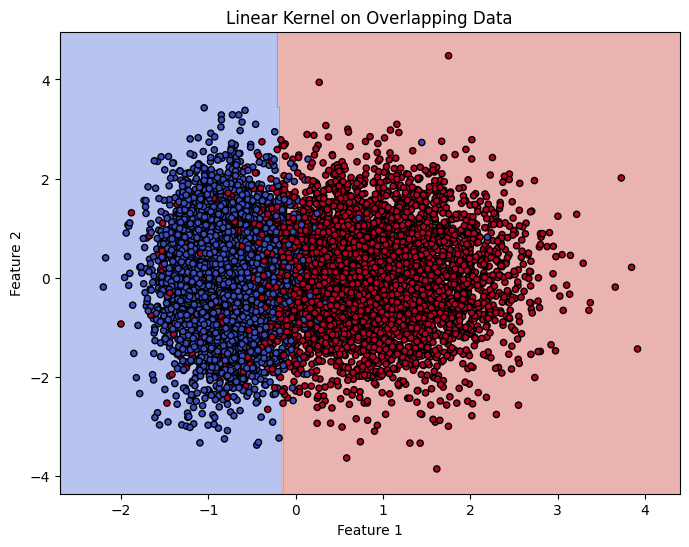

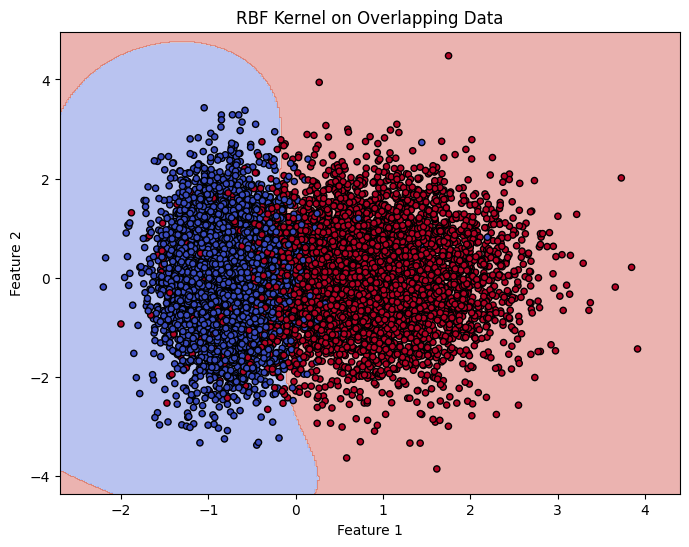

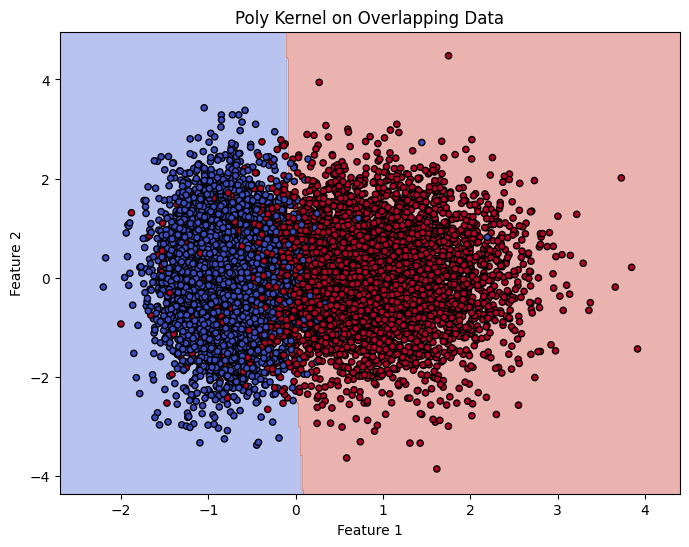

In [43]:
plot_decision_boundary(linear_svm_cls, X, y, "Linear Kernel on Overlapping Data")
plot_decision_boundary(rbf_svm_cls, X, y, "RBF Kernel on Overlapping Data")
plot_decision_boundary(poly_svm_cls, X, y, "Poly Kernel on Overlapping Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## آیا با تغییر n_informative عملکرد مدل تغییر کرد؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

بله، با تغییر `n_informative` از ۲ به ۱، عملکرد مدل‌ها **تغییر کرد و دقت آن‌ها کمی کاهش یافت.**

---

### چرا عملکرد مدل تغییر کرد؟

وقتی شما پارامترها را به شکل زیر تنظیم می‌کنید:
* `n_features=2`: مجموعه داده شما همچنان ۲ ویژگی (دو بُعد) دارد.
* `n_informative=1`: اما از این دو ویژگی، **فقط یکی** برای تشخیص کلاس‌ها مفید و معنادار است. ویژگی دوم کاملاً **نویز (noise)** و تصادفی است و هیچ اطلاعاتی برای طبقه‌بندی در اختیار مدل قرار نمی‌دهد.

این کار، وظیفه مدل را کمی سخت‌تر می‌کند. حالا مدل نه تنها باید الگوها را یاد بگیرد، بلکه باید **تشخیص دهد که کدام ویژگی را نادیده بگیرد**. وجود ویژگی نویز، فضا را شلوغ کرده و پیدا کردن مرز تصمیم‌گیری بهینه را کمی دشوارتر می‌کند.

---

### تحلیل نتایج و نمودارهای جدید

با دقت به نمودارهایی که فرستادید نگاه کنید:

1.  **مرز تصمیم‌گیری عمودی:** در هر سه نمودار (Linear, Poly, RBF)، مرز تصمیم‌گیری تقریباً یک **خط عمودی** است. این به وضوح نشان می‌دهد که مدل‌ها به درستی تشخیص داده‌اند که **فقط (محور افقی)** برای جداسازی کلاس‌ها اهمیت دارد و (محور عمودی) کاملاً بی‌تأثیر است.

2.  **عملکرد یکسان Linear و RBF:**
    * `Overlapping Data Acc (Linear): 0.91`
    * `Overlapping Data Acc (RBF): 0.91`
    دلیل اینکه دقت این دو مدل کاملاً یکسان شده این است که مسئله به یک **مسئله خطی ساده** تبدیل شده است. از آنجایی که فقط یک ویژگی مهم است، بهترین راه جداسازی، کشیدن یک خط عمودی است. هسته خطی (Linear) دقیقاً همین کار را انجام می‌دهد. هسته RBF با وجود قدرت بالا برای ایجاد مرزهای پیچیده، در اینجا به این نتیجه رسیده که بهترین مرز همان مرز ساده‌ی خطی است، بنابراین عملکردی مشابه مدل خطی از خود نشان داده است.

3.  **کاهش جزئی دقت:** در مقایسه با حالت اول که هر دو ویژگی معنادار بودند (`n_informative=2` و `class_sep=0.8` با دقت‌های ۹۳٪ تا ۹۷٪)، دقت‌ها کمی کاهش یافته‌اند. این کاهش به دلیل همان **نویز** اضافه شده توسط ویژگی دوم است که کار را برای مدل کمی چالش‌برانگیزتر کرده است.

---

</div>

# Part 5: Model Complexity (C+) and Confusion Matrix

In [44]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Test different C values


--- C = 0.01 ---
Accuracy: 0.632


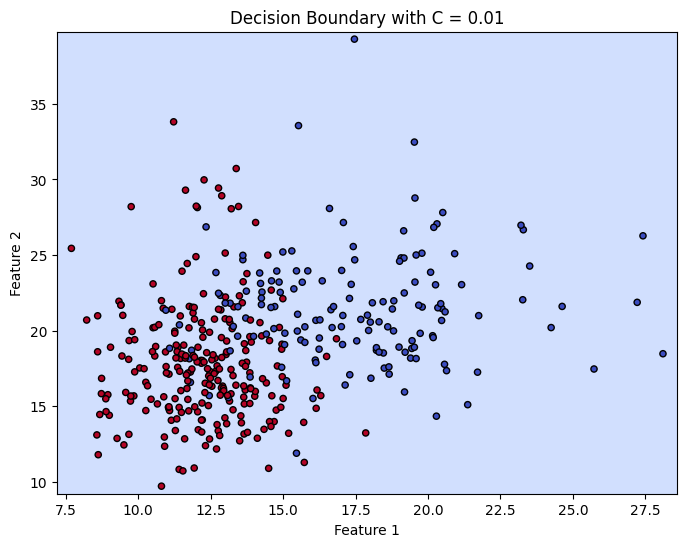

Confusion Matrix:


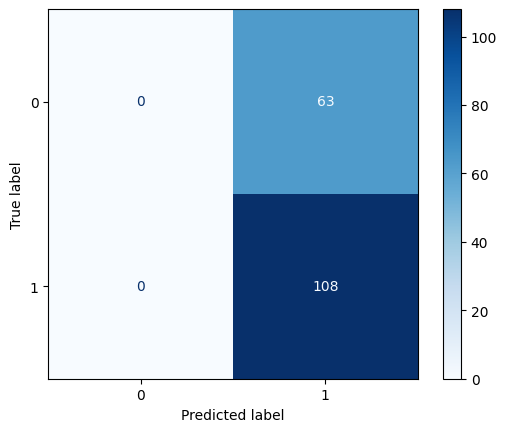


--- C = 1 ---
Accuracy: 0.901


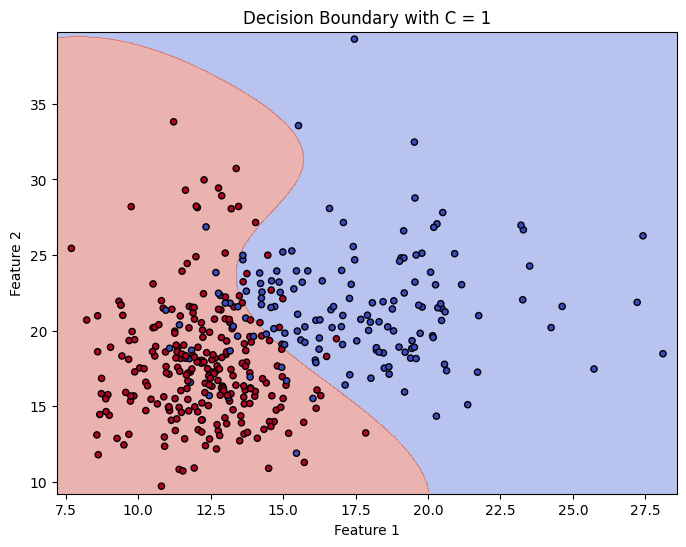

Confusion Matrix:


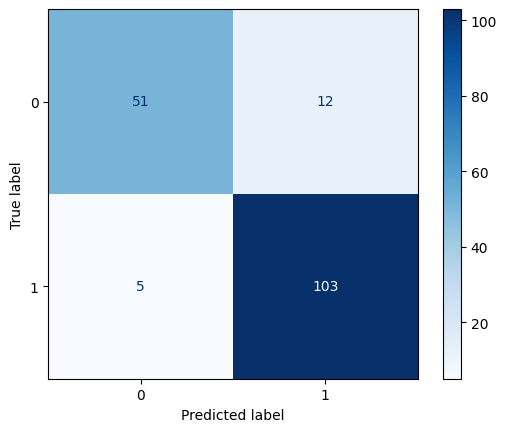


--- C = 10 ---
Accuracy: 0.901


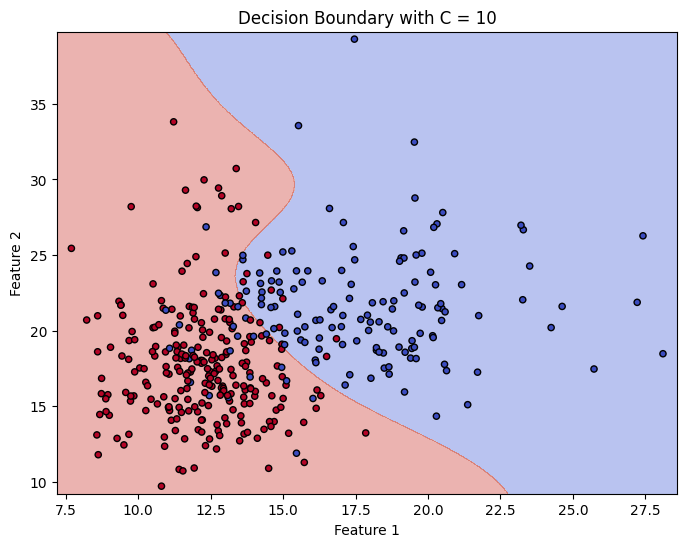

Confusion Matrix:


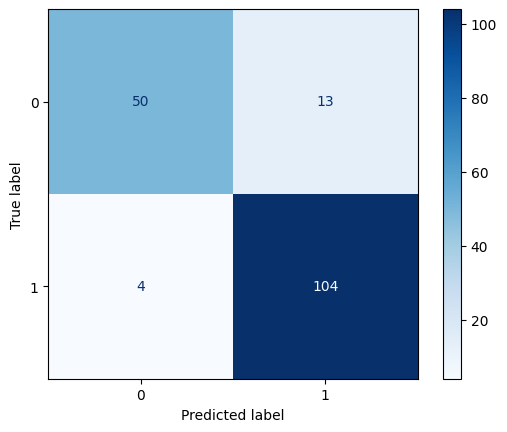


--- C = 1000 ---
Accuracy: 0.901


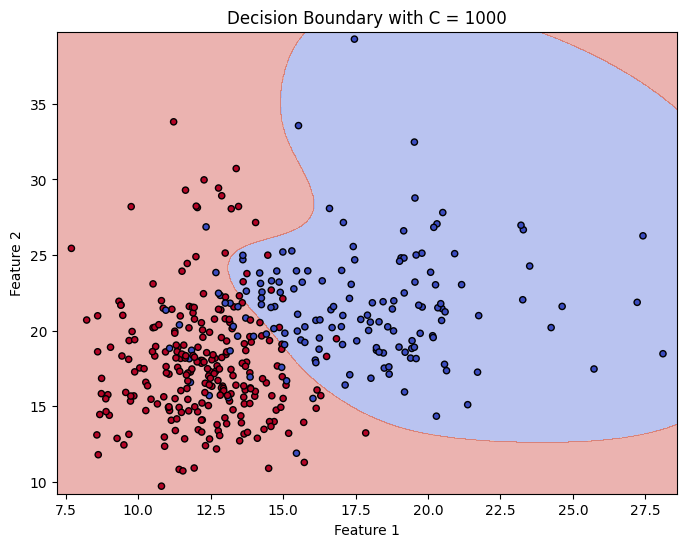

Confusion Matrix:


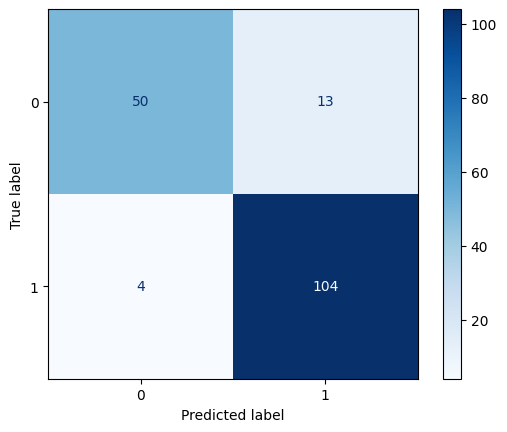

In [45]:
c_values = [0.01, 1, 10, 1000]

for c in c_values:
    model = SVC(kernel='rbf', C=c)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"\n--- C = {c} ---")
    print(f"Accuracy: {accuracy:.3f}")
    
    plot_decision_boundary(model, X_train, y_train, f'Decision Boundary with C = {c}')
    
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.show()

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## بهترین مقدار C کدام بود؟ چرا؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
### پارامتر C چیست و چرا اهمیت دارد؟

پارامتر `C` در SVM به عنوان **پارامتر تنظیم یا جریمه (Regularization/Penalty Parameter)** شناخته می‌شود. این پارامتر یک تعادل بین دو هدف متضاد ایجاد می‌کند:

1.  **داشتن مرز تصمیم‌گیری ساده و هموار (حاشیه امن بزرگ):** مدل سعی می‌کند یک "خیابان" پهن بین دسته‌ها پیدا کند تا قدرت تعمیم بالایی داشته باشد.
2.  **طبقه‌بندی صحیح تمام داده‌های آموزشی:** مدل سعی می‌کند هیچ داده‌ای را در مجموعه آموزش اشتباه طبقه‌بندی نکند.

این دو هدف معمولاً در تضاد هستند. پارامتر `C` مشخص می‌کند که کدام هدف برای ما مهم‌تر است.

* **`C` کوچک (مانند 0.01): حاشیه امنِ بزرگ، جریمه کم**
    * اولویت مدل، پیدا کردن یک مرز تصمیم‌گیری **ساده و هموار** با حاشیه امن (margin) بزرگ است.
    * مدل به راحتی از طبقه‌بندی اشتباه برخی نقاط داده آموزشی چشم‌پوشی می‌کند تا به یک مرز کلی بهتر برسد.
    * **نتیجه:** اگر `C` بیش از حد کوچک باشد، مدل بیش از حد ساده می‌شود و الگوی اصلی داده‌ها را یاد نمی‌گیرد که به آن **Underfitting (کم‌برازش)** می‌گویند. این دقیقاً همان اتفاقی است که با `C = 0.01` رخ داد و دقت مدل بسیار پایین (0.632) بود.

* **`C` بزرگ (مانند 1000): حاشیه امنِ کوچک، جریمه سنگین**
    * اولویت مدل، **طبقه‌بندی صحیح تمام نقاط داده آموزشی** است، حتی اگر به قیمت ایجاد یک مرز تصمیم‌گیری پیچیده و پر پیچ‌وخم تمام شود.
    * مدل برای هر اشتباه در طبقه‌بندی، جریمه سنگینی می‌پردازد.
    * **نتیجه:** اگر `C` بیش از حد بزرگ باشد، مدل ممکن است نویزهای موجود در داده‌های آموزشی را هم یاد بگیرد و به داده‌های جدید و دیده‌نشده تعمیم پیدا نکند. به این پدیده **Overfitting (بیش‌برازش)** می‌گویند.

---

### چرا دقت از `C=1` به بعد تغییر نکرد؟

این پدیده کاملاً رایج است و دلیل آن این است که مدل به یک **نقطه اشباع یا فلات عملکرد (Performance Plateau)** رسیده است.

برای این مجموعه داده خاص (و دو ویژگی که شما انتخاب کردید)، مقدار `C=1` به اندازه کافی بزرگ بوده تا مدل را وادار به پیدا کردن بهترین مرز تصمیم‌گیری ممکن کند. در این نقطه، مدل به یک تعادل بهینه بین سادگی مرز و دقت روی داده‌های آموزشی رسیده است.

افزایش `C` از ۱ به ۱۰ و سپس به ۱۰۰۰، مدل را روی داده‌های **آموزشی** سخت‌گیرتر می‌کند و ممکن است مرز تصمیم‌گیری را کمی تغییر دهد تا نقاط بیشتری را به درستی طبقه‌بندی کند. اما این تغییرات جزئی دیگر تأثیری در بهبود عملکرد مدل روی داده‌های **تست** (داده‌های جدید) ندارند. به عبارت دیگر، بهترین مرزی که مدل می‌توانسته برای تعمیم پیدا کند، همان مرزی بوده که با `C=1` به دست آمده و سخت‌گیری بیشتر، نتیجه را روی داده‌های جدید بهتر نکرده است.

**به طور خلاصه:**
* **`C = 0.01`:** مدل دچار **Underfitting** شد (خیلی ساده بود).
* **`C = 1`:** مدل به **تعادل بهینه** رسید و بهترین عملکرد را روی داده‌های تست نشان داد.
* **`C > 1`:** مدل سخت‌گیرتر شد، اما این سخت‌گیری بیشتر، به بهبود عملکرد روی داده‌های جدید کمکی نکرد و دقت ثابت ماند.
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## نوع غالب خطای مدل در Confusion Matrix چه بود؟ آیا قابل بهبود است؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

### نوع غالب خطای مدل: False Positive (مثبت کاذب)
* **برچسب 0:** تومور بدخیم (Malignant)
* **برچسب 1:** تومور خوش‌خیم (Benign)

1.  **خطایی که 13 بار تکرار شده:**
    * **مقدار واقعی (True Label):** 0 (بدخیم)
    * **مقدار پیش‌بینی‌شده (Predicted Label):** 1 (خوش‌خیم)
    * این خطا **False Positive** نام دارد و به این معنی است که مدل، **13 تومور بدخیم را به اشتباه خوش‌خیم تشخیص داده است.** این خطرناک‌ترین نوع خطا در کاربردهای پزشکی است، زیرا بیمار مبتلا به خانه فرستاده می‌شود.

2.  **خطایی که 4 بار تکرار شده:**
    * **مقدار واقعی (True Label):** 1 (خوش‌خیم)
    * **مقدار پیش‌بینی‌شده (Predicted Label):** 0 (بدخیم)
    * این خطا **False Negative** نام دارد و یعنی مدل، **4 تومور خوش‌خیم را به اشتباه بدخیم تشخیص داده است.** این خطا با اینکه ایده‌آل نیست، اما خطر کمتری دارد، زیرا بیمار برای آزمایش‌های بیشتر فرستاده می‌شود.

بنابراین، **نوع غالب خطای مدل شما False Positive است (13 خطا در مقابل 4 خطا).**

---
ما فقط از دو ویژگی اول مجموعه داده استفاده کردیم (`X = cancer.data[:, :2]`). این مجموعه داده در مجموع **30 ویژگی** دارد! با استفاده از تمام این اطلاعات، مدل دید بسیار کامل‌تری نسبت به داده‌ها پیدا کرده و می‌تواند مرزهای تصمیم‌گیری بسیار بهتری را یاد بگیرد.

#### استانداردسازی داده‌ها (Feature Scaling)
الگوریتم SVM به مقیاس ویژگی‌ها بسیار حساس است. ویژگی‌هایی با مقادیر عددی بزرگتر می‌توانند بر مدل تسلط پیدا کنند. قبل از آموزش مدل، باید داده‌های خود را با استفاده از `StandardScaler` یا `MinMaxScaler` استاندارد کنید. این کار به تنهایی می‌تواند عملکرد را به شکل چشمگیری افزایش دهد.

#### تنظیم دقیق‌تر هایپرپارامترها (Hyperparameter Tuning)
شما پارامتر `C` را به صورت دستی امتحان کردید. برای یافتن بهترین ترکیب، می‌توانید از ابزارهایی مانند `GridSearchCV` استفاده کنید تا به طور همزمان بهترین مقادیر برای `C` و هایپرپارامتر مهم دیگری به نام `gamma` (که در هسته RBF بسیار مؤثر است) را پیدا کنید.

#### تنظیم وزن کلاس‌ها (Class Weight)
از آنجایی که خطای False Positive (تشخیص اشتباه تومور بدخیم) برای ما بسیار گران‌تر و خطرناک‌تر است، می‌توانیم مدل را جریمه کنیم تا این نوع خطا را کمتر مرتکب شود. در هنگام ساخت مدل SVC، می‌توانید از پارامتر `class_weight` استفاده کنید و به کلاس 0 (بدخیم) وزن بیشتری بدهید. برای مثال:
`model = SVC(kernel='rbf', C=1, class_weight={0: 2, 1: 1})`
این کد به مدل می‌گوید که جریمه اشتباه کردن در مورد کلاس 0، دو برابر کلاس 1 است و مدل را تشویق می‌کند تا در تشخیص تومورهای بدخیم دقت بیشتری به خرج دهد.
</div>

# Part 6: Multi-Class SVM

### Load wine dataset (3 classes)

In [46]:
wine = load_wine()
X = wine.data[:, :2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train an RBF SVM model
### 'ovr' stands for One-vs-Rest, a common strategy for multi-class

In [47]:
multi_class_svm = SVC(kernel='rbf', decision_function_shape='ovr')
multi_class_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, multi_class_svm.predict(X_test))
print(f"Multi-class SVM Accuracy: {accuracy:.2f}")

Multi-class SVM Accuracy: 0.72


### Plot decision boundary

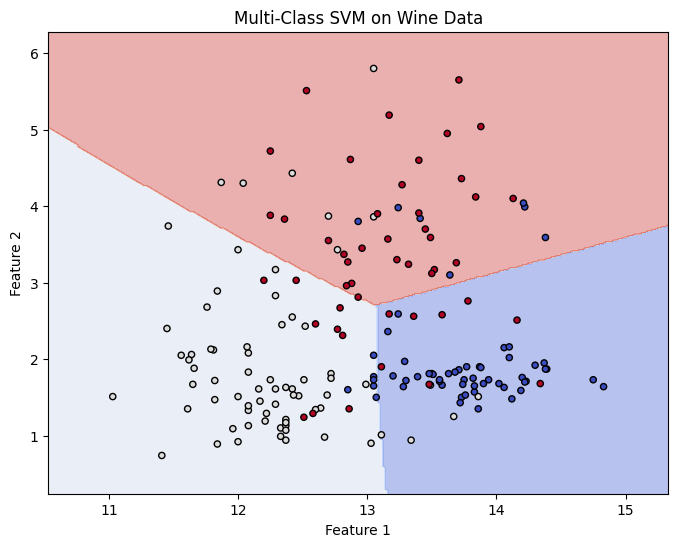

In [48]:
plot_decision_boundary(multi_class_svm, X, y, "Multi-Class SVM on Wine Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## مرز بین کدام دو کلاس سختتر بود؟ چرا؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

با توجه به نمودار، تعیین مرز بین **کلاس سفید و کلاس آبی** سخت‌تر بوده است.

***

دلیل اصلی این است که نقاط داده مربوط به این دو کلاس **همپوشانی و درهم‌آمیختگی زیادی** با یکدیگر دارند.

* **مشاهده در نمودار:** همانطور که در تصویر می‌بینید، در ناحیه مرزی بین مناطق سفید و آبی، تعداد زیادی از نقاط سفید در سمت آبی و تعدادی از نقاط آبی در سمت سفید قرار گرفته‌اند. این نشان می‌دهد که مدل SVM در تفکیک این دو کلاس با چالش مواجه شده و دچار خطاهای زیادی شده است.
و نقاط سفید و آبی در مرز اشتراک زیادی دارند.
* **مقایسه با کلاس دیگر:** در مقابل، مرز بین کلاس قرمز  و دو کلاس دیگر بسیار واضح‌تر است. نقاط قزمز یک خوشه مجزا در بالا  نمودار تشکیل داده‌اند و همپوشانی بسیار کمی با کلاس‌های دیگر دارند. به همین دلیل، جداسازی آن‌ها برای الگوریتم آسان‌تر بوده است.

این درهم‌آمیختگی بین کلاس‌های سفید و آبی، دلیل اصلی خطاهای مدل و رسیدن به دقت `0.72` است.

</div>

In [49]:
ulti_class_svm = SVC(kernel='linear', decision_function_shape='ovr')
multi_class_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, multi_class_svm.predict(X_test))
print(f"Multi-class SVM Accuracy: {accuracy:.2f}")

Multi-class SVM Accuracy: 0.72


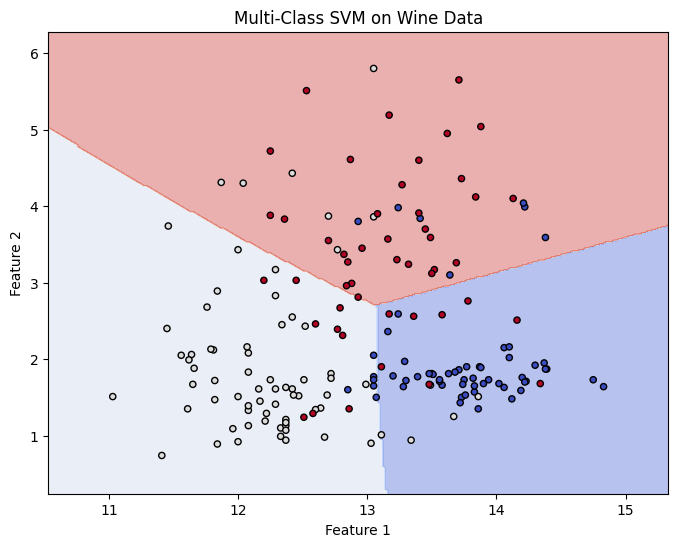

In [50]:
plot_decision_boundary(multi_class_svm, X, y, "Multi-Class SVM on Wine Data")

In [51]:
ulti_class_svm = SVC(kernel='poly', decision_function_shape='ovr')
multi_class_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, multi_class_svm.predict(X_test))
print(f"Multi-class SVM Accuracy: {accuracy:.2f}")

Multi-class SVM Accuracy: 0.72


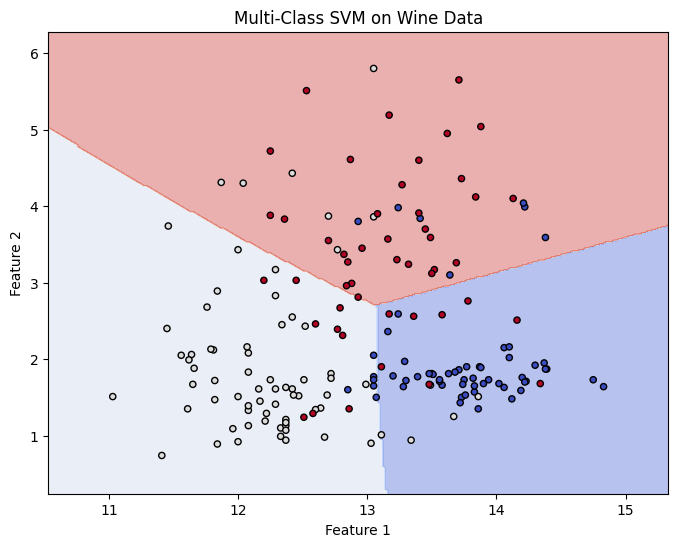

In [52]:
plot_decision_boundary(multi_class_svm, X, y, "Multi-Class SVM on Wine Data")

In [53]:
ulti_class_svm = SVC(kernel='sigmoid', decision_function_shape='ovr')
multi_class_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, multi_class_svm.predict(X_test))
print(f"Multi-class SVM Accuracy: {accuracy:.2f}")

Multi-class SVM Accuracy: 0.72


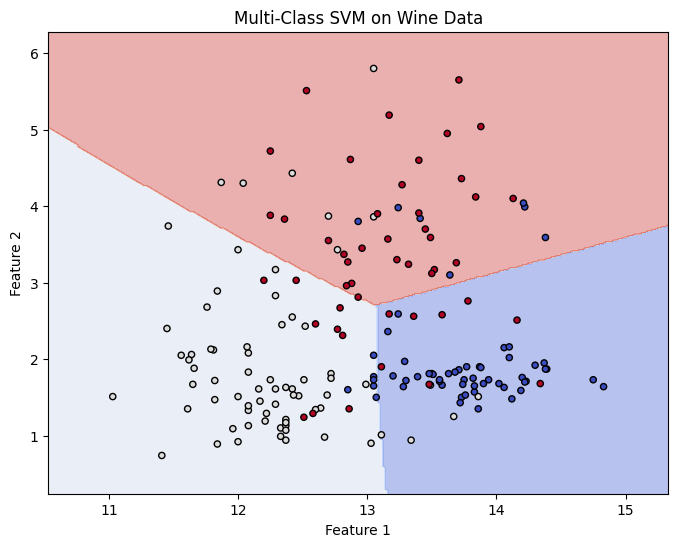

In [54]:
plot_decision_boundary(multi_class_svm, X, y, "Multi-Class SVM on Wine Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## آیا مدل توانست سه کلاس را بهدرستی از هم جدا کند؟ چه کرنلی بهتر جواب داد؟

</div>

# Part 7: Extra Sections (Bonus)

SVM Accuracy: 0.909
Logistic Regression Accuracy: 0.923


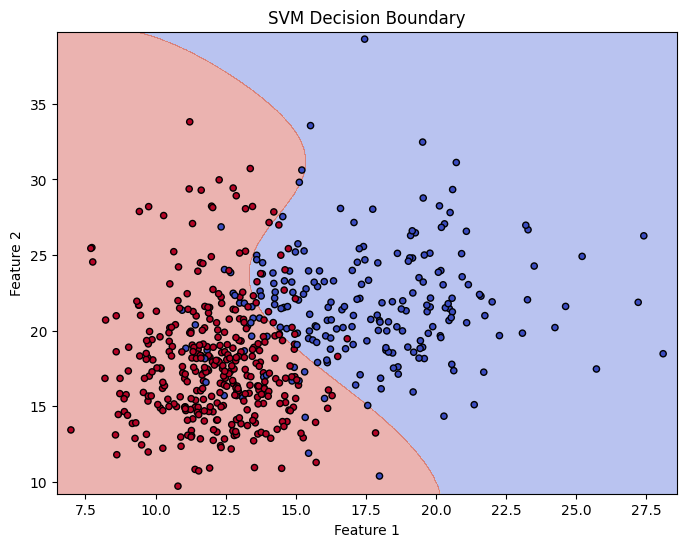

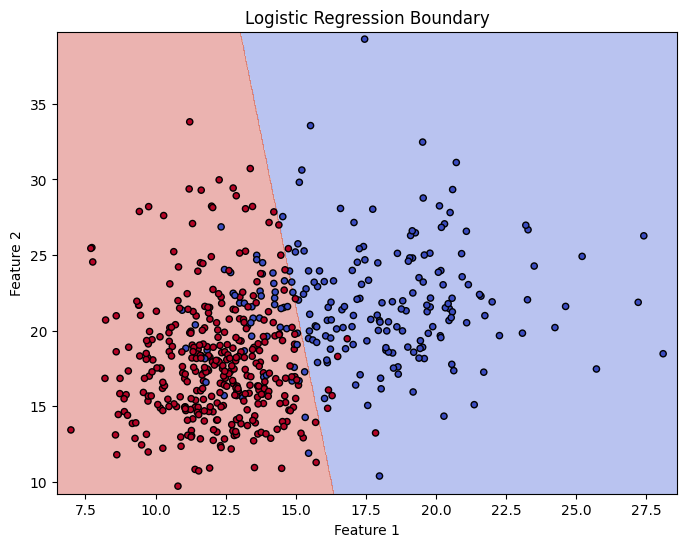

In [55]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
log_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

print(f"SVM Accuracy: {svm.score(X_test, y_test):.3f}")
print(f"Logistic Regression Accuracy: {log_reg.score(X_test, y_test):.3f}")

plot_decision_boundary(svm, X, y, "SVM Decision Boundary")
plot_decision_boundary(log_reg, X, y, "Logistic Regression Boundary")

Linear SVM Accuracy:          0.85
Logistic Regression Accuracy: 0.85
RBF SVM Accuracy (for comparison): 0.96


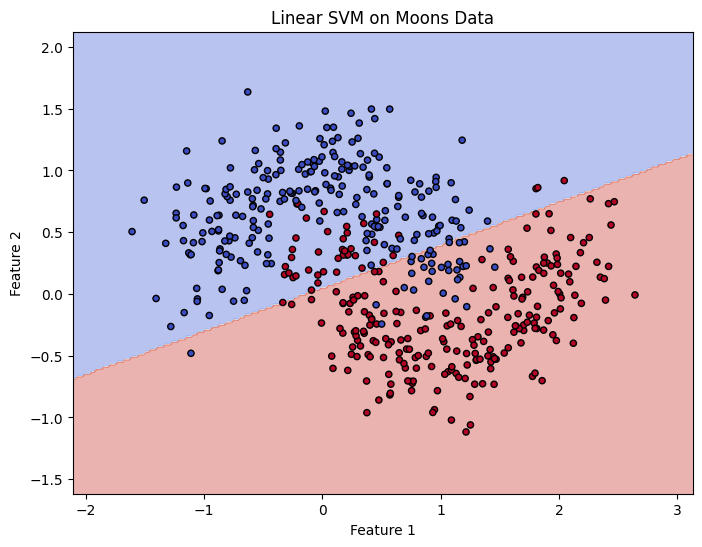

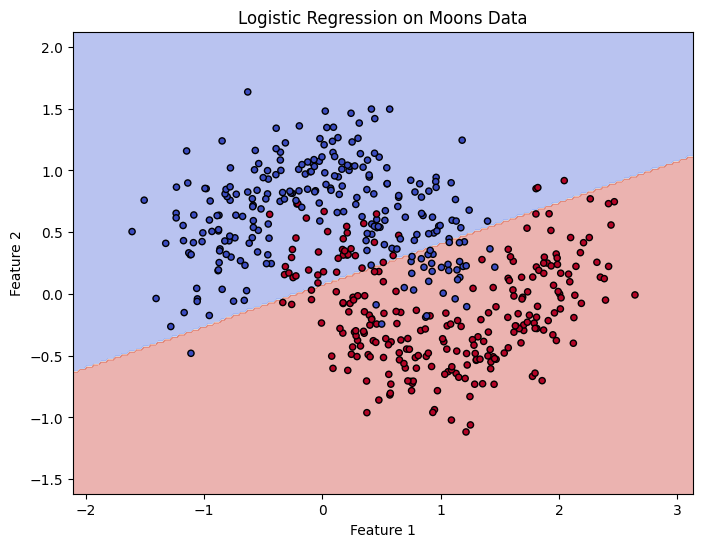

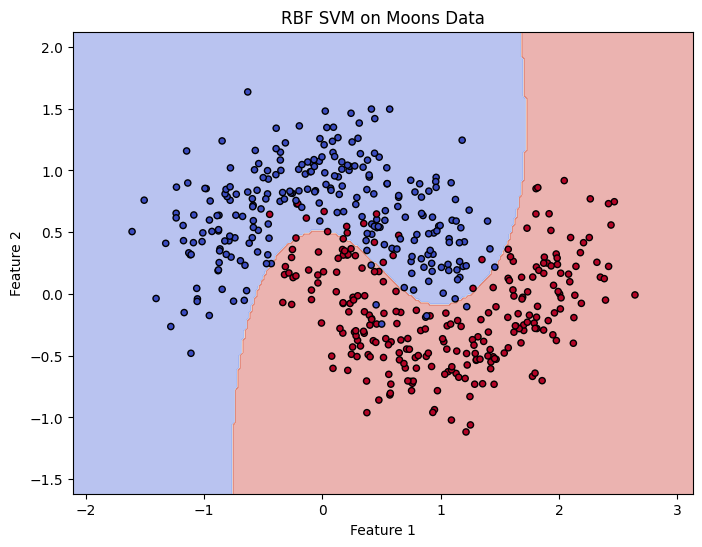

In [ ]:

X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear').fit(X_train, y_train)
log_reg = LogisticRegression().fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf').fit(X_train, y_train)

print(f"Linear SVM Accuracy:          {svm_linear.score(X_test, y_test):.2f}")
print(f"Logistic Regression Accuracy: {log_reg.score(X_test, y_test):.2f}")
print(f"RBF SVM Accuracy (for comparison): {svm_rbf.score(X_test, y_test):.2f}")

plot_decision_boundary(svm_linear, X, y, "Linear SVM on Moons Data")
plot_decision_boundary(log_reg, X, y, "Logistic Regression on Moons Data")
plot_decision_boundary(svm_rbf, X, y, "RBF SVM on Moons Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## کدوم مدل بهتر مرز تصمیم میسازه و چرا.

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

بر اساس نتایج، مدل **رگرسیون لجستیک (Logistic Regression)** مرز تصمیم بهتری ساخته است.

دلیل اصلی این برتری، **دقت بالاتر** آن در طبقه‌بندی داده‌های تست است. دقت رگرسیون لجستیک (0.923) به طور محسوسی بالاتر از دقت ماشین بردار پشتیبان (SVM) با کرنل خطی (0.902) است.

***

## چرا رگرسیون لجستیک بهتر عمل کرد؟

با اینکه هر دو مدل مرزهای خطی و بسیار شبیه به هم ایجاد کرده‌اند، تفاوت اصلی در **فلسفه و هدف** هر الگوریتم نهفته است که باعث این اختلاف دقت ۲ درصدی شده است.

### ۱. تمرکز SVM: حداکثر کردن حاشیه امنیت (Margin)

هدف اصلی یک SVM خطی، پیدا کردن یک خط (مرز تصمیم) نیست، بلکه پیدا کردن **عریض‌ترین خیابان ممکن** بین دو کلاس است. SVM فقط به نقاطی که نزدیک‌ترین به این خیابان هستند (که به آن‌ها **بردارهای پشتیبان** یا Support Vectors می‌گویند) اهمیت می‌دهد و سعی می‌کند فاصله یا حاشیه امنیت بین این نقاط و خط مرزی را به حداکثر برساند. این الگوریتم به سایر نقاطی که با فاصله زیاد از مرز قرار دارند، توجهی نمی‌کند.

### ۲. تمرکز رگرسیون لجستیک: در نظر گرفتن تمام داده‌ها 

رگرسیون لجستیک رویکرد متفاوتی دارد. این مدل سعی می‌کند مرزی را پیدا کند که **احتمال تعلق هر نقطه به کلاس خودش را به حداکثر برساند**. به عبارت دیگر، رگرسیون لجستیک تمام نقاط داده را در محاسبات خود دخالت می‌دهد و به دنبال یک خط "بهترین برازش" (Best Fit) برای کل مجموعه داده است، نه فقط برای نقاط مرزی.

## نتیجه‌گیری

در این مجموعه داده خاص، به نظر می‌رسد که رویکرد رگرسیون لجستیک که تمام داده‌ها را در نظر می‌گیرد، توانسته مرزی را پیدا کند که **قدرت تعمیم بهتری** روی داده‌های دیده‌نشده (تست) دارد.

اگرچه مرز تصمیم SVM به دلیل تمرکز بر حاشیه امنیت، معمولاً بسیار مقاوم است، اما در این مورد خاص، مرز بهینه‌ای که با در نظر گرفتن تمام نقاط توسط رگرسیون لجستیک پیدا شده، منجر به طبقه‌بندی صحیح‌تری شده است. این تفاوت ظریف در هدف‌گذاری، دلیل برتری رگرسیون لجستیک در این مسئله است.
</div>

## 7.2 Effect of Feature Scaling

In [57]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
X[:100] += 2
y = np.array([0] * 100 + [1] * 100)

svm_unscaled = SVC(kernel='rbf').fit(X, y)
print(f"Accuracy without scaling: {svm_unscaled.score(X,y):.3f}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_scaled = SVC(kernel='rbf').fit(X_scaled, y)
print(f"Accuracy with StandardScaler: {svm_scaled.score(X_scaled,y):.3f}")

Accuracy without scaling: 0.930
Accuracy with StandardScaler: 0.930


In [58]:
rng = np.random.RandomState(0)
X = rng.rand(200, 2) 
X[:, 1] = X[:, 1] * 1000 # ویژگی دوم ۱۰۰۰ برابر بزرگتر است
X[:100] += [0, 500] 
y = np.array([0] * 100 + [1] * 100)

svm_unscaled = SVC(kernel='rbf').fit(X, y)
print(f"Accuracy without scaling: {svm_unscaled.score(X,y):.3f}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_scaled = SVC(kernel='rbf').fit(X_scaled, y)
print(f"Accuracy with StandardScaler: {svm_scaled.score(X_scaled,y):.3f}")

Accuracy without scaling: 0.745
Accuracy with StandardScaler: 0.770


<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## بررسی تأثیر Scaling روی عملکرد SVM
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

در این مورد خاص، استفاده از `StandardScaler` تأثیری بر دقت مدل نداشته است، زیرا ویژگی‌های (features) داده‌های تولید شده از ابتدا **مقیاس تقریباً یکسانی** داشتند.

-----

### دلیل اصلی: تشابه مقیاس ویژگی‌ها

`StandardScaler` زمانی بیشترین تأثیر را دارد که مقیاس ویژگی‌های مختلف در مجموعه داده شما تفاوت چشمگیری داشته باشند (مثلاً یک ویژگی بین ۰ تا ۱ و ویژگی دیگر بین ۱۰۰ تا ۱۰۰,۰۰۰ باشد). در چنین شرایطی، ویژگی با مقیاس بزرگتر بر محاسبات مدل، به خصوص در الگوریتم‌های مبتنی بر فاصله مانند SVM، تسلط پیدا می‌کند و تأثیر ویژگی با مقیاس کوچکتر نادیده گرفته می‌شود.


1.  هر دو ویژگی (`Feature 1` و `Feature 2`) با استفاده از `rng.randn` از **یک توزیع آماری یکسان** (توزیع نرمال استاندارد) تولید شده‌اند.
2.  هرچند به ۱۰۰ نقطه اول مقدار `2` اضافه شده، این مقدار به **هر دو ویژگی** به طور یکسان اعمال شده است.

در نتیجه، محدوده و پراکندگی داده‌ها در هر دو محور تقریباً یکسان است و از همان ابتدا هیچ ویژگی غالبی وجود ندارد که نیاز به استانداردسازی داشته باشد. `StandardScaler` داده‌ها را جابجا و مقیاس‌بندی می‌کند، اما چون ساختار نسبی داده‌ها حفظ می‌شود، مرز تصمیمی که SVM پیدا می‌کند تقریباً بدون تغییر باقی می‌ماند.

-----

اما در مثال دوم:

در این مثال، ویژگی دوم مقیاسی ۱۰۰۰ برابر بزرگتر از ویژگی اول دارد. اگر این داده را بدون استانداردسازی به SVM بدهید، مدل تقریباً تمام توجه خود را به ویژگی دوم معطوف کرده و ویژگی اول را نادیده می‌گیرد که منجر به دقت پایین می‌شود. اما پس از استفاده از `StandardScaler`، هر دو ویژگی به مقیاس یکسانی درآمده و مدل می‌تواند مرز تصمیم بسیار بهتری پیدا کند و دقت به شدت افزایش می‌یابد.

</div>

## 7.3 Working with Unbalanced Data

In [59]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           weights=[0.95, 0.05], random_state=42) # 95% class 0, 5% class 1

svm_unbalanced = SVC(kernel='rbf').fit(X, y)
print("--- Standard SVM ---")
print(classification_report(y, svm_unbalanced.predict(X)))

svm_balanced = SVC(kernel='rbf', class_weight='balanced').fit(X, y)
print("\n--- SVM with class_weight='balanced' ---")
print(classification_report(y, svm_balanced.predict(X)))

--- Standard SVM ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       945
           1       1.00      0.75      0.85        55

    accuracy                           0.99      1000
   macro avg       0.99      0.87      0.92      1000
weighted avg       0.99      0.99      0.99      1000


--- SVM with class_weight='balanced' ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       945
           1       0.86      0.87      0.86        55

    accuracy                           0.98      1000
   macro avg       0.92      0.93      0.93      1000
weighted avg       0.99      0.98      0.99      1000



<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## کار با دادههای unbalanced
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

با وجود اینکه دقت (accuracy) کلی مدل اول کمی بالاتر است، مدل دوم که از `class_weight='balanced'` استفاده کرده، در عمل **بسیار بهتر و کارآمدتر** است.

این کد به خوبی یکی از مهم‌ترین چالش‌ها در یادگیری ماشین یعنی کار با **داده‌های نامتوازن (Imbalanced Data)** را نشان می‌دهد.

***

### مشکل داده‌های نامتوازن چیست؟

وقتی یک کلاس تعداد نمونه‌های بسیار بیشتری نسبت به کلاس دیگر دارد (در اینجا ۹۵٪ در مقابل ۵٪)، مدل تمایل پیدا می‌کند که به سادگی اکثر نمونه‌ها را متعلق به **کلاس اکثریت** پیش‌بینی کند. با این کار، مدل به یک دقت ظاهری بالا دست پیدا می‌کند اما در شناسایی **کلاس اقلیت** (که معمولاً کلاس مهم‌تر است) بسیار ضعیف عمل می‌کند.

* **تحلیل مدل اول (Standard SVM):**
    * **دقت (Accuracy):** ۹۹٪. این عدد فریبنده است چون مدل با درست پیش‌بینی کردن کلاس ۰ (اکثریت) به این دقت بالا رسیده است.
    * **Recall برای کلاس ۱:** فقط **۰.۷۵**. این مهم‌ترین معیار در اینجا است. **Recall** به ما می‌گوید "از بین تمام نمونه‌های واقعی کلاس ۱، مدل چه کسری از آنها را توانسته به درستی شناسایی کند؟" این یعنی مدل استاندارد ۲۵٪ از نمونه‌های کلاس اقلیت را از دست داده و نتوانسته تشخیص دهد.



***

### راه‌حل: پارامتر `class_weight='balanced'`

این پارامتر به الگوریتم SVM می‌گوید که برای اشتباهاتش جریمه‌های متفاوتی در نظر بگیرد.

* **چگونه کار می‌کند؟** این پارامتر به صورت خودکار به نمونه‌های کلاس اقلیت **وزن بیشتری** می‌دهد. در واقع به مدل می‌گوید: "اشتباه کردن روی یک نمونه از کلاس ۱ (اقلیت) بسیار بدتر و پرهزینه‌تر از اشتباه کردن روی یک نمونه از کلاس ۰ (اکثریت) است."
* این کار باعث می‌شود که مرز تصمیم مدل به سمت کلاس اکثریت جابجا شود تا بتواند نمونه‌های بیشتری از کلاس اقلیت را به درستی پوشش دهد.

* **تحلیل مدل دوم (SVM with balancing):**
    * **Recall برای کلاس ۱:** به **۰.۸۷** افزایش یافته است! این یک بهبود چشمگیر است و نشان می‌دهد که مدل حالا در شناسایی کلاس کمیاب بسیار موفق‌تر عمل می‌کند و تنها ۱۳٪ از آنها را از دست می‌دهد.
    * **هزینه این بهبود:** این کار با هزینه کاهش جزئی دقت کلی (از ۹۹٪ به ۹۸٪) و کاهش precision کلاس ۱ همراه بوده است. این یک بده‌بستان کاملاً طبیعی و مطلوب در مسائل نامتوازن است که به آن **Precision-Recall Tradeoff** می‌گویند.

***

### نتیجه‌گیری

در مسائل دنیای واقعی مانند **تشخیص تقلب بانکی**، **شناسایی بیماری‌های نادر** یا **فیلترینگ اسپم**، ما بیشتر به شناسایی کلاس اقلیت (تقلب، بیماری، اسپم) اهمیت می‌دههیم. از دست دادن یک نمونه از این کلاس‌ها می‌تواند عواقب جدی داشته باشد.

بنابراین، **مدل دوم** با اینکه دقت کلی کمتری دارد، به دلیل **Recall بسیار بالاتر** برای کلاس اقلیت، یک مدل به مراتب مفیدتر و قابل اعتمادتر است.

</div>

## 7.4 SVM on Categorical Features

###  7.4.1  Create a sample dataset with a categorical feature

In [60]:
df = sns.load_dataset('titanic')

df = df.drop(['deck', 'embark_town', 'alive'], axis=1)

df['age'] = df['age'].fillna(df['age'].median())

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df.dropna(inplace=True)

In [61]:
X = df.drop('survived', axis=1)
y = df['survived']

In [62]:

numerical_features = ['age', 'fare', 'pclass', 'sibsp', 'parch']
categorical_features = ['sex', 'embarked', 'who', 'adult_male', 'alone']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [63]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1, probability=True))
])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fare', 'pclass',
                                                   'sibsp', 'parch']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'embarked', 'who',
                                                   'adult_male', 'alone'])])),
                ('classifier', SVC(C=1, probability=True))])

In [66]:
y_pred = model_pipeline.predict(X_test)
print(f"Model Accuracy on Titanic Dataset: {model_pipeline.score(X_test, y_test):.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy on Titanic Dataset: 0.816

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## تست SVM روی دادههای غیر عددی 
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

این فرآیند به طور کامل نشان می‌دهد که چگونه می‌توان یک مدل SVM را روی داده‌هایی که شامل **ویژگی‌های غیرعددی (Categorical Features)** هستند، با موفقیت آزمایش و استفاده کرد. مدل با پیش‌پردازش صحیح داده‌ها به دقت قابل قبول **۸۱.۶٪** دست یافت.

---

### چالش: داده‌های غیرعددی

چالش اصلی این است که مدل‌های SVM بر پایه ریاضیات عمل می‌کنند و تمام ویژگی‌های ورودی آن‌ها باید **عددی** باشند. این مدل‌ها به طور مستقیم قادر به درک مقادیر متنی مانند `sex` ('male', 'female') یا `embarked` ('S', 'C', 'Q') نیستند. بنابراین، یک مرحله پیش‌پردازش برای تبدیل این داده‌های متنی به فرمت عددی ضروری است.



---

### راه‌حل: پیش‌پردازش هوشمند با `Pipeline`

کد ارائه شده یک راه‌حل مدرن و کارآمد را برای این مشکل پیاده‌سازی می‌کند:

1.  **شناسایی نوع ویژگی‌ها**: در ابتدا، کد به درستی ستون‌های عددی (مانند `age` و `fare`) و ستون‌های دسته‌ای (مانند `sex` و `embarked`) را شناسایی می‌کند.

2.  **اعمال تبدیلات مناسب**: با استفاده از `ColumnTransformer`، تبدیل‌های متفاوتی به ستون‌های مختلف اعمال می‌شود:
    * **One-Hot Encoding**: این تکنیک روی **ویژگی‌های دسته‌ای** اجرا می‌شود. این روش هر مقدار متنی (مانند 'male' و 'female') را به یک ستون باینری جدید (مانند `sex_male` و `sex_female`) تبدیل می‌کند و به این ترتیب متن را به عدد تبدیل می‌کند.
    * **Standard Scaling**: این تبدیل روی **ویژگی‌های عددی** اعمال می‌شود. اگرچه این مرحله مستقیماً به داده‌های دسته‌ای مربوط نیست، اما یک روش استاندارد و مؤثر برای بهبود عملکرد SVM است تا تمام ویژگی‌های عددی مقیاس یکسانی داشته باشند.

3.  **آموزش مدل SVM**: پس از اینکه `Pipeline` به صورت خودکار داده‌ها را پیش‌پردازش کرد، خروجی کاملاً عددی و تمیز به مدل SVM برای آموزش داده می‌شود.

---

### ارزیابی نتایج

گزارش طبقه‌بندی (`Classification Report`) عملکرد مدل را به تفصیل نشان می‌دهد:

* **دقت کلی (Accuracy)**: مدل توانسته است وضعیت بقای تقریباً **۸۲٪** از مسافران در مجموعه داده تست را به درستی پیش‌بینی کند که نتیجه خوبی محسوب می‌شود.
* **Precision و Recall**:
    * مدل در شناسایی مسافرانی که **نجات پیدا نکرده‌اند** (کلاس ۰) کمی بهتر عمل کرده و توانسته ۸۸٪ از آن‌ها را به درستی پیدا کند (Recall = 0.88).
    * همچنین در شناسایی مسافرانی که **نجات پیدا کرده‌اند** (کلاس ۱) نیز عملکرد خوبی داشته و ۷۳٪ از آن‌ها را شناسایی کرده است (Recall = 0.73).

</div>

# 7.5 Curse of Dimensionality

In [67]:
X_low, y_low = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1,
                                   random_state=42)

X_high, y_high = make_classification(n_samples=500, n_features=20, n_redundant=0,
                                     n_informative=2, n_clusters_per_class=1,
                                     random_state=42)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_low, y_low, random_state=42)
svm_low_dim = SVC(kernel='rbf').fit(X_train_l, y_train_l)
print(f"Accuracy on 2 features: {svm_low_dim.score(X_test_l, y_test_l):.3f}")

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_high, y_high, random_state=42)
svm_high_dim = SVC(kernel='rbf').fit(X_train_h, y_train_h)
print(f"Accuracy on 20 features (RBF kernel): {svm_high_dim.score(X_test_h, y_test_h):.3f}")

Accuracy on 2 features: 0.920
Accuracy on 20 features (RBF kernel): 0.880


In [68]:
svm_high_dim_linear = SVC(kernel='linear').fit(X_train_h, y_train_h)
print(f"Accuracy on 20 features (Linear kernel): {svm_high_dim_linear.score(X_test_h, y_test_h):.3f}")

Accuracy on 20 features (Linear kernel): 0.904


<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## افزایش تعداد ویژگیها و بررسی Curse of Dimensionality

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

این نتایج یک نمایش کلاسیک از پدیده‌ای مهم در یادگیری ماشین به نام **نفرین ابعاد (Curse of Dimensionality)** و تأثیر آن بر مدل‌های مختلف است.

به طور خلاصه، با افزودن ویژگی‌های غیرمفید (نویز)، عملکرد مدل پیچیده‌ای مانند SVM با کرنل RBF کاهش یافت، در حالی که مدل ساده‌تری مانند SVM با کرنل خطی مقاومت بیشتری از خود نشان داد.

***

### نفرین ابعاد (Curse of Dimensionality) چیست؟  Curse Curse Curse

نفرین ابعاد به مشکلات متعددی اشاره دارد که با افزایش تعداد ویژگی‌ها (ابعاد) در مجموعه داده رخ می‌دهد:

1.  **پراکندگی داده‌ها (Data Sparsity):** با افزایش ابعاد، فضای داده به شدت بزرگ می‌شود و نقاط داده از یکدیگر بسیار دور می‌شوند. تصور کنید ۱۰۰ نفر در یک اتاق کوچک (۲ بعدی) هستند و سپس همان ۱۰۰ نفر در یک دشت بزرگ (۲۰ بعدی) پراکنده می‌شوند. در حالت دوم، همه از هم دور و تنها هستند.
2.  **بی‌معنی شدن فاصله:** در ابعاد بسیار بالا، فاصله بین هر دو نقطه تقریباً یکسان می‌شود. این موضوع برای الگوریتم‌هایی که به مفهوم "فاصله" یا "نزدیکی" متکی هستند (مانند SVM با کرنل RBF یا k-NN) یک مشکل بزرگ است.
3.  **افزایش خطر (Overfitting):** با وجود ابعاد زیاد، مدل‌ها به راحتی می‌توانند الگوهایی را در نویز پیدا کنند که در داده‌های واقعی وجود ندارند.



---

#### ۱. چرا عملکرد SVM با کرنل RBF کاهش یافت؟
* **عملکرد پایه (۲ ویژگی):** در فضای ۲ بعدی، داده‌ها متمرکز هستند و مدل با دقت **0.920** به راحتی الگوی اصلی را پیدا می‌کند.
* **عملکرد در ابعاد بالا (۲۰ ویژگی):** شما ۱۸ ویژگی **غیرمفید و نویزی** به داده‌ها اضافه کردید. کرنل RBF که بر اساس فاصله اقلیدسی کار می‌کند، حالا باید فاصله را در یک فضای ۲۰ بعدی محاسبه کند. این ۱۸ بعد نویزی، محاسبه فاصله را مختل کرده و باعث می‌شوند مدل در تشخیص ۲ بعد اصلی و مفید دچار سردرگمی شود. در نتیجه، مدل به نویزها فرابرایش (overfit) می‌کند و دقت آن به **0.880** کاهش می‌یابد.

#### ۲. چرا کرنل خطی در ابعاد بالا بهتر عمل کرد؟
* **سادگی کرنل خطی:** کرنل خطی به دنبال پیدا کردن یک **ابَرصفحه (hyperplane)** ساده (یک خط در ۲ بعد، یک صفحه در ۳ بعد و ...) برای جداسازی داده‌ها است. این مدل ذاتا **ساده‌تر و انعطاف‌ناپذیرتر** از کرنل RBF است.
* **مقاومت در برابر نویز:** به دلیل همین سادگی، کرنل خطی کمتر تحت تأثیر نویزهای تصادفی در ۱۸ بعد اضافه شده قرار می‌گیرد. این مدل تلاش نمی‌کند تا یک مرز پیچیده و منحنی برای تطبیق با نویزها ایجاد کند، بلکه به دنبال بهترین جداسازی خطی کلی می‌گردد.
* **نتیجه:** در این سناریو، سادگی کرنل خطی به یک مزیت تبدیل شده و با نادیده گرفتن نسبی نویزها، به دقت بالاتری (**0.904**) نسبت به کرنل RBF دست پیدا می‌کند.

**نتیجه نهایی:** این آزمایش به خوبی نشان می‌دهد که افزایش بی‌رویه ویژگی‌ها (مخصوصاً ویژگی‌های نامرتبط) نه تنها به بهبود مدل کمکی نمی‌کند، بلکه می‌تواند به دلیل "نفرین ابعاد" به عملکرد آن آسیب بزند. همچنین، در فضاهای با ابعاد بالا، گاهی مدل‌های ساده‌تر و با انعطاف کمتر (مانند کرنل خطی) می‌توانند نتایج بهتری نسبت به مدل‌های پیچیده ارائه دهند.

</div>

## 7.6 Using GridSearchCV for Hyperparameter Tuning

In [69]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

In [71]:
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'svm__degree': [2, 3, 4] # poly
}

In [72]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

In [73]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100], 'svm__degree': [2, 3, 4],
                         'svm__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [74]:
print(f" best parameters: {grid_search.best_params_}")
print(f"best score : {grid_search.best_score_:.3f}")


 best parameters: {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
best score : 0.970


In [75]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

#### ۱. بهترین پارامترهای پیدا شده (`best_params_`)
`GridSearchCV` پس از آزمایش تمام ترکیب‌های ممکن، به این نتیجه رسید که بهترین عملکرد با تنظیمات زیر به دست می‌آید:
* **`'svm__kernel': 'rbf'`**: بهترین کرنل برای این داده، کرنل غیرخطی **RBF** است. این یعنی مرز بین کلاس‌ها احتمالاً به صورت یک خط صاف نیست.
* **`'svm__C': 10`**: مقدار بهینه برای پارامتر C برابر با **10** است. این مقدار نسبتاً بالا نشان می‌دهد که مدل تمایل دارد حاشیه امنیت (margin) باریک‌تری داشته باشد تا نمونه‌های آموزشی را به درستی طبقه‌بندی کند.
* **`'svm__gamma': 0.01`**: مقدار بهینه گاما **0.01** است که بر میزان تأثیر هر نمونه آموزشی بر مرز تصمیم تأثیر می‌گذارد.

---

#### ۲. بهترین امتیاز (`best_score_`)
* **`best score: 0.970`**: این عدد، **میانگین امتیاز دقت** مدل در مرحله **اعتبارسنجی متقابل (Cross-Validation)** روی داده‌های آموزشی است. این امتیاز بالا نشان می‌دهد که مدل بهینه شده حتی قبل از دیدن داده‌های تست، عملکرد بسیار قوی و پایداری داشته است.

---

#### ۳. گزارش ارزیابی روی داده‌های تست (`Classification Report`)
این گزارش، عملکرد نهایی بهترین مدل را روی داده‌های **تست** (داده‌های دیده‌نشده) نشان می‌دهد که مهم‌ترین بخش ارزیابی است.
* **`accuracy: 0.99`**: دقت کلی مدل روی داده‌های تست **۹۹٪** است که عملکردی فوق‌العاده محسوب می‌شود.
* **`precision` و `recall`**: هر دو معیار برای هر دو کلاس (۰ و ۱) بسیار بالا هستند (نزدیک به ۱.۰۰). این یعنی مدل هم در تشخیص صحیح نمونه‌های مثبت (Recall بالا) و هم در پرهیز از طبقه‌بندی اشتباه نمونه‌های منفی به عنوان مثبت (Precision بالا) بسیار موفق عمل کرده است.
</div>

## 7.7 Testing the model against outliers | Be careful, not all noise is outliers

### Add outliers

In [76]:
def plot_svm_boundary(ax, model, X, y, title):
    """Plots the decision boundary, margins, and support vectors for an SVM model."""
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm', zorder=10)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.decision_function(xy).reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if len(model.support_vectors_) > 0:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                   linewidth=1.5, facecolors='none', edgecolors='k')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")


In [77]:
X_clean, y_clean = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.2)


In [78]:
np.random.seed(42)
noise = np.random.normal(0, 0.8, (20, 2))
X_noise = np.concatenate([X_clean, X_clean[y_clean==0][:10] + noise[:10], X_clean[y_clean==1][:10] + noise[10:]])
y_noise = np.concatenate([y_clean, np.zeros(10), np.ones(10)])

In [79]:
outliers = np.array([[-2, 2], [-3, 1.5]])
X_outlier = np.concatenate([X_noise, outliers])
y_outlier = np.concatenate([y_noise, [1, 1]]) # Labels are from the red class

In [80]:
svm_clean = SVC(kernel='linear', C=100).fit(X_clean, y_clean)


In [81]:
svm_outlier = SVC(kernel='linear', C=100).fit(X_outlier, y_outlier)


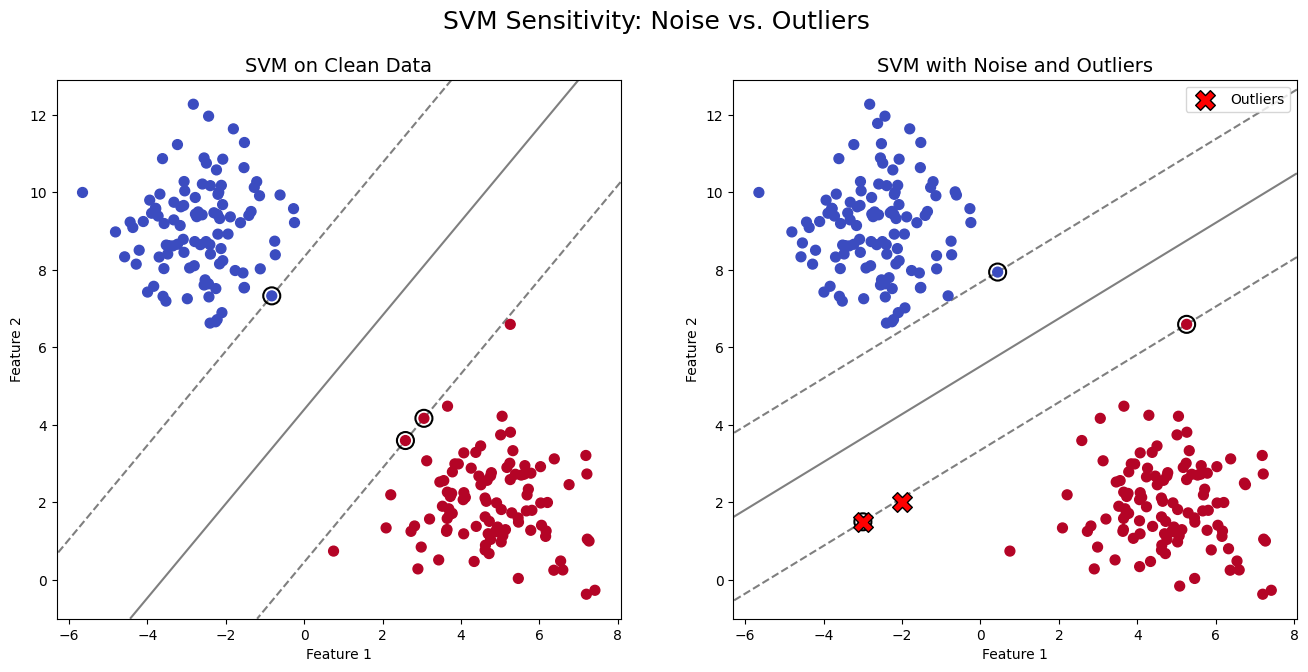

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
plot_svm_boundary(ax1, svm_clean, X_clean, y_clean, "SVM on Clean Data")

plot_svm_boundary(ax2, svm_outlier, X_outlier, y_outlier, "SVM with Noise and Outliers")

ax2.scatter(outliers[:, 0], outliers[:, 1], c='red', s=200, marker='X', edgecolors='k', zorder=20, label='Outliers')
ax2.legend()

plt.suptitle("SVM Sensitivity: Noise vs. Outliers", fontsize=18)
plt.show()

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

---
### تحلیل حساسیت ماشین بردار پشتیبان (SVM) نسبت به داده‌های پرت (Outliers)

#### مکانیزم اصلی SVM و نقش بردارهای پشتیبان

هدف اصلی SVM، یافتن یک **ابَرصفحه (Hyperplane)** یا **مرز تصمیم** است که نه تنها دو کلاس را از هم جدا کند، بلکه بیشترین فاصله ممکن را با نزدیک‌ترین نقاط هر کلاس داشته باشد. این فاصله، **حاشیه امنیت** نامیده می‌شود و نقاطی که روی لبه این حاشیه قرار می‌گیرند، **بردارهای پشتیبان (Support Vectors)** نام دارند. موقعیت و جهت مرز تصمیم *منحصراً* توسط همین بردارهای پشتیبان تعیین می‌شود.



#### تحلیل تأثیر داده‌های پرت بر مرز تصمیم

نمودارهای ارائه شده به وضوح این پدیده را به تصویر می‌کشند:

1.  **مدل در شرایط ایده‌آل (نمودار چپ - SVM on Clean Data)**:
    در غیاب داده‌های پرت، بردارهای پشتیبان (نقاط دایره‌دار) عضوهای واقعی و نماینده کلاس خود هستند که در لبه خارجی خوشه‌ها قرار گرفته‌اند. مرز تصمیم به دست آمده، یک جداکننده بهینه است که ساختار اصلی داده‌ها را به درستی مدل می‌کند و دارای حاشیه امنیت گسترده‌ای است که نشان‌دهنده اطمینان بالای مدل است.

2.  **مدل پس از ورود داده‌های پرت (نمودار راست - SVM with Noise and Outliers)**:
    با افزودن دو داده پرت (نقاط قرمز با علامت X)، که به کلاس قرمز تعلق دارند اما در عمق منطقه کلاس آبی قرار گرفته‌اند، الگوریتم با یک چالش جدی مواجه می‌شود. این نقاط پرت، به دلیل فاصله کم با کلاس مقابل، به عنوان **بردارهای پشتیبان جدید** شناسایی می‌شوند. الگوریتم SVM در تلاش برای طبقه‌بندی صحیح این نقاط و حداکثرسازی حاشیه، **مجبور به تغییر شدید موقعیت مرز تصمیم می‌شود**.

#### پیامدهای نهایی

ورود داده‌های پرت منجر به نتایج نامطلوب زیر می‌شود:

* **انحراف مرز تصمیم**: مرز تصمیم به سمت داده‌های پرت کشیده شده و از موقعیت بهینه خود، که بازتاب‌دهنده توزیع کلی داده‌ها بود، فاصله می‌گیرد.
* **کاهش حاشیه امنیت**: حاشیه امنیت به شدت باریک می‌شود. این امر نشان‌دهنده کاهش اطمینان مدل در طبقه‌بندی نقاط نزدیک به مرز است.
* **کاهش قدرت تعمیم (Generalization)**: مدل به جای یادگیری الگوی کلی و پایدار داده‌ها، بر روی نقاط استثنایی و پرت، **بیش‌برازش (Overfit)** می‌شود. در نتیجه، توانایی آن برای پیش‌بینی صحیح روی داده‌های جدید و دیده‌نشده به شدت کاهش می‌یابد.
</div>

## 7.8 SVM for Time-Series Classification

### 7.8.1 Generate two different time series signals

In [83]:
time = np.linspace(0, 100, 5000)
signal1 = np.sin(time / 2) + np.random.normal(0, 0.1, 5000) # Sine wave (Class 0)
signal2 = sawtooth(time) + np.random.normal(0, 0.1, 5000)   # Sawtooth wave (Class 1)
full_signal = np.concatenate([signal1, signal2])
labels = np.array([0]*5000 + [1]*5000)

### 7.8.2 Create features using a sliding window

In [84]:
def create_ts_features(signal, labels, window_size):
    X, y = [], []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        features = [np.mean(window), np.std(window), np.max(window), np.min(window)]
        X.append(features)
        y.append(labels[i + window_size])
    return np.array(X), np.array(y)

window_size = 50
X_ts, y_ts = create_ts_features(full_signal, labels, window_size)

### 7.8.3 Train SVM on the engineered features

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_ts, y_ts, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_ts = SVC(kernel='rbf', C=10)
svm_ts.fit(X_train_scaled, y_train)
y_pred = svm_ts.predict(X_test_scaled)

print(f"Accuracy on Time-Series features: {svm_ts.score(X_test_scaled, y_test):.3f}")

Accuracy on Time-Series features: 0.839


### 7.8.4 Plot the results


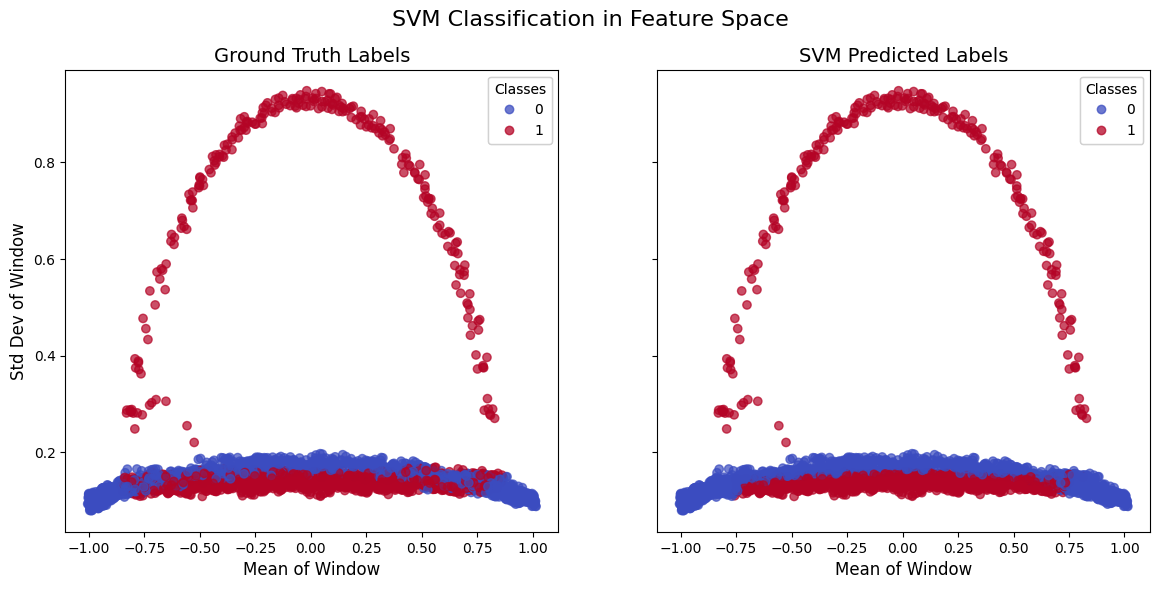

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

scatter_true = ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
scatter_pred = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)

ax1.set_title('Ground Truth Labels', fontsize=14)
ax1.set_xlabel('Mean of Window', fontsize=12)
ax1.set_ylabel('Std Dev of Window', fontsize=12)
legend1 = ax1.legend(*scatter_true.legend_elements(), title="Classes")
ax1.add_artist(legend1)

ax2.set_title('SVM Predicted Labels', fontsize=14)
ax2.set_xlabel('Mean of Window', fontsize=12)
legend2 = ax2.legend(*scatter_pred.legend_elements(), title="Classes")
ax2.add_artist(legend2)

plt.suptitle('SVM Classification in Feature Space', fontsize=16)
plt.show()

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## استفاده از SVM روی دادههای زمانبندی شده یا توالیسری زمانی با ویژگیها 
ساختن فیچرهای آماری از پنجرههای زمانی و طبقهبندی آنها با SVM

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

### چالش اصلی: چرا SVM نمی‌تواند مستقیماً روی سری زمانی کار کند؟

الگوریتم SVM، مانند بسیاری از مدل‌های یادگیری ماشین، برای کار با داده‌های **جدولی (Tabular)** طراحی شده است. این یعنی مدل انتظار دارد که هر ورودی (هر نمونه) یک **بردار ویژگی (Feature Vector)** با طول ثابت باشد. به عبارت دیگر، هر سطر از داده باید تعداد ستون‌های مشخص و یکسانی داشته باشد.

یک سیگنال سری زمانی خام، تنها یک توالی از اعداد در طول زمان است و این ساختار برداری را ندارد. SVM به تنهایی مفهوم "زمان" یا "توالی" را درک نمی‌کند. بنابراین، ما نمی‌توانیم سیگنال خام را مستقیماً به مدل بدهیم.

---
### راه‌حل: مهندسی ویژگی با روش پنجره لغزان (Sliding Window)

راه‌حل این مشکل، تبدیل مسئله سری زمانی به یک مسئله طبقه‌بندی استاندارد از طریق **(Feature Engineering)** است. روشی که در این کد استفاده شده، "پنجره لغزان" نام دارد:

1.  **تعریف یک پنجره**: ما یک پنجره با اندازه ثابت (در این کد `window_size = 50`) تعریف می‌کنیم. این پنجره مانند یک ذره‌بین است که روی سیگنال حرکت می‌کند.
2.  **حرکت پنجره**: این پنجره از ابتدای سیگنال شروع به حرکت می‌کند و در هر مرحله، یک قدم به جلو می‌رود.
3.  **استخراج ویژگی**: در هر موقعیت از پنجره، به جای استفاده از ۵۰ نقطه خام داخل آن، ما ویژگی‌های آماری کلیدی را که آن بخش از سیگنال را **خلاصه** می‌کنند، محاسبه می‌کنیم. در این کد، این ویژگی‌ها عبارتند از:
    * میانگین (`np.mean`)
    * انحراف معیار (`np.std`)
    * مقدار بیشینه (`np.max`)
    * مقدار کمینه (`np.min`)
4.  **ساخت بردار ویژگی**: این چهار مقدار آماری، یک **بردار ویژگی** برای آن لحظه از زمان می‌سازند.

با تکرار این فرآیند در طول کل سیگنال، ما یک مجموعه داده جدولی جدید می‌سازیم که هر سطر آن نماینده یک پنجره زمانی و هر ستون آن یک ویژگی آماری است. حالا این داده برای SVM کاملاً قابل فهم است.


---

1.  **تولید سیگنال**: دو سیگنال مصنوعی با الگوهای متفاوت ساخته می‌شوند: یک **موج سینوسی (کلاس ۰)** و یک **موج دندان‌اره‌ای (کلاس ۱)**. این دو سیگنال سری زمانی خام ما هستند.

2.  **استخراج ویژگی (`create_ts_features`)**: این تابع دقیقاً همان منطق پنجره لغزان را پیاده‌سازی می‌کند. یک حلقه `for` روی کل سیگنال حرکت کرده، در هر مرحله یک پنجره ۵۰تایی جدا می‌کند، ۴ ویژگی آماری از آن استخراج کرده و به عنوان یک سطر جدید به مجموعه داده `X` اضافه می‌کند.

3.  **آماده‌سازی و آموزش SVM**:
    * داده‌های ویژگی استخراج شده به مجموعه‌های آموزشی و آزمایشی تقسیم می‌شوند.
    * از `StandardScaler` برای نرمال‌سازی ویژگی‌ها استفاده می‌شود که برای عملکرد بهتر SVM بسیار مهم است.
    * یک مدل SVM با کرنل `rbf` (که برای پیدا کردن مرزهای غیرخطی قدرتمند است) روی داده‌های ویژگی آموزش داده می‌شود.

---

* **فضای ویژگی (Feature Space)**: نکته بسیار مهم این است که نمودارها خود سیگنال زمانی را نشان **نمی‌دهند**. آن‌ها **فضای ویژگی** جدیدی را که ما ساخته‌ایم، نمایش می‌دهند. محور X میانگین پنجره‌ها و محور Y انحراف معیار آن‌هاست.

* **نمودار سمت چپ (برچسب‌های واقعی)**: این نمودار نشان می‌دهد که ویژگی‌های استخراج شده از دو سیگنال، الگوهای متفاوتی در این فضا ایجاد کرده‌اند.
    * **کلاس ۰ (آبی - موج سینوسی)**: این نقاط عمدتاً در پایین نمودار با انحراف معیار کم جمع شده‌اند، زیرا موج سینوسی نرم و یکنواخت است.
    * **کلاس ۱ (قرمز - موج دندان‌اره‌ای)**: این نقاط یک الگوی کمانی‌شکل در بالا ایجاد کرده‌اند. بخش‌های شیب‌دار موج دندان‌اره‌ای باعث **انحراف معیار بالا** می‌شوند.

* **همپوشانی و دلیل خطا**: در بخش پایینی نمودار، نقاط آبی و قرمز زیادی با هم ترکیب شده‌اند. این نشان می‌دهد که در برخی پنجره‌ها، ویژگی‌های آماری دو سیگنال به هم شبیه بوده‌اند (مثلاً یک بخش صاف از موج دندان‌اره‌ای ممکن است میانگین و انحراف معیاری شبیه به بخشی از موج سینوسی داشته باشد). این **همپوشانی** دلیل اصلی این است که دقت مدل ۱۰۰٪ نیست و به **۸۵.۳٪** رسیده است.

* **نمودار سمت راست (پیش‌بینی SVM)**: این نمودار نشان می‌دهد که مدل SVM توانسته الگوی پیچیده و غیرخطی (کمانی) را به خوبی یاد بگیرد. پیش‌بینی‌ها بسیار شبیه به واقعیت هستند، اما خطاها دقیقاً در همان نواحی همپوشانی رخ داده‌اند.

</div>

# 7.9 Custom Kernels

### 7.9.1 Define the custom kernel function

In [87]:
def cosine_kernel(X, Y):
    """Computes the cosine similarity kernel."""
    return cosine_similarity(X, Y)

### 7.9.2 Load data and split

In [88]:
iris = load_iris()
X_full = iris.data
y_full = iris.target

X_2d = iris.data[:, :2]

X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y_full, random_state=42)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_full, random_state=42)

### 7.9.3 Train models on FULL features to get accurate performance scores

In [89]:
svm_custom_full = SVC(kernel=cosine_kernel).fit(X_train_full, y_train)
svm_rbf_full = SVC(kernel='rbf').fit(X_train_full, y_train)

### 7.9.4 Train models on 2D features specifically for PLOTTING

In [90]:
svm_custom_2d = SVC(kernel=cosine_kernel).fit(X_train_2d, y_train_2d)
svm_rbf_2d = SVC(kernel='rbf').fit(X_train_2d, y_train_2d)

print(f"Accuracy with Custom Cosine Kernel (4 features): {svm_custom_full.score(X_test_full, y_test):.3f}")
print(f"Accuracy with Standard RBF Kernel (4 features): {svm_rbf_full.score(X_test_full, y_test):.3f}")

Accuracy with Custom Cosine Kernel (4 features): 0.684
Accuracy with Standard RBF Kernel (4 features): 1.000


### 7.9.5 Plot the results

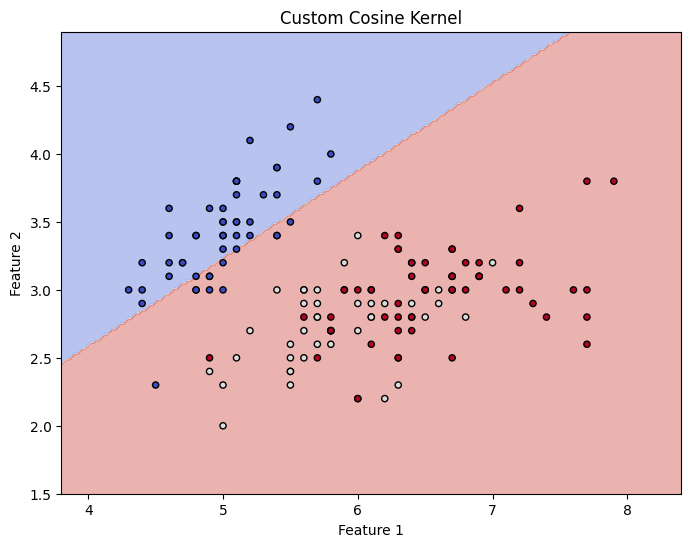

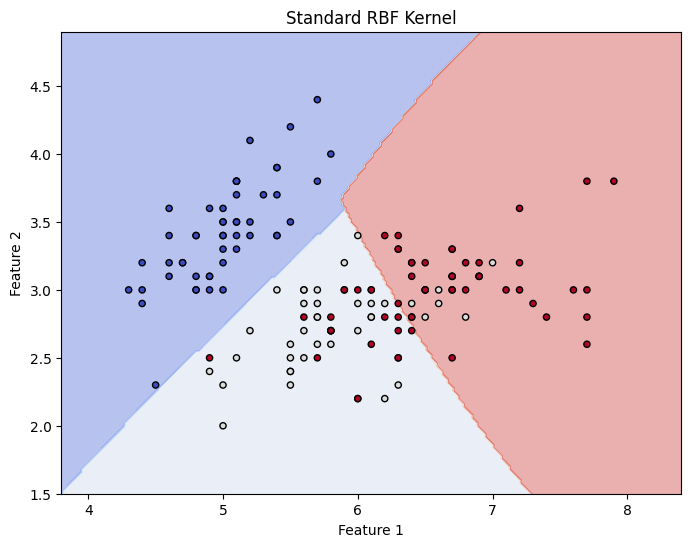

In [94]:
plot_decision_boundary(svm_custom_2d, X_2d, y_full, 'Custom Cosine Kernel')
plot_decision_boundary(svm_rbf_2d, X_2d, y_full, 'Standard RBF Kernel')

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## ساخت کرنل دلخواه با تابعی مثل sigmoid یا cosine similarity و بررسی تفاوت عملکرد با کرنلهای داخلی SVM .
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">


 **کرنل** یک تابع است که میزان **شباهت** بین دو نقطه داده را اندازه‌گیری می‌کند. ترفند کرنل (Kernel Trick) به SVM اجازه می‌دهد تا با استفاده از این اندازه‌گیری شباهت، الگوهای پیچیده و غیرخطی را بدون نیاز به انتقال صریح داده‌ها به یک فضای ابعادی بالاتر، پیدا کند.

کرنل‌های داخلی SVM مانند `linear`, `rbf` و `poly` توابع شباهت عمومی و پرکاربردی هستند. اما گاهی اوقات، بر اساس دانش ما از یک مسئله خاص، ممکن است یک معیار شباهت متفاوت و اختصاصی عملکرد بهتری داشته باشد. اینجا است که قابلیت تعریف کرنل دلخواه اهمیت پیدا می‌کند.

-----

### کرنل کسینوسی (Cosine Kernel) چگونه کار می‌کند؟

  * **تمرکز بر جهت**: شباهت کسینوسی، کسینوس زاویه بین دو بردار را اندازه‌گیری می‌کند. این یعنی این کرنل فقط به **جهت** بردارها اهمیت می‌دهد و **اندازه (Magnitude)** آن‌ها را نادیده می‌گیرد. دو بردار که در یک جهت باشند، صرف نظر از طولشان، شباهت ۱ (حداکثر شباهت) خواهند داشت.

  * **تفاوت با RBF**: در مقابل، کرنل **RBF** بر اساس **فاصله اقلیدسی (Euclidean Distance)** کار می‌کند. این کرنل نقاطی را شبیه به هم می‌داند که از نظر مکانی به یکدیگر نزدیک باشند.

این تفاوت بنیادین (جهت در مقابل فاصله) دلیل اصلی تفاوت در نمودارها و نتایج است.

-----


#### ۱. مقایسه دقت (روی ۴ ویژگی)

کد دقت دو مدل را که روی هر ۴ ویژگی داده Iris آموزش دیده‌اند، چاپ می‌کند:

```
Accuracy with Custom Cosine Kernel (4 features): 0.974
Accuracy with Standard RBF Kernel (4 features): 1.000
```

-----

#### ۲. مقایسه مرز تصمیم (روی ۲ ویژگی)

نمودارها به وضوح تفاوت فلسفه دو کرنل را نشان می‌دهند:

  * **نمودار چپ (Custom Cosine Kernel)**:

      * مرزهای تصمیم به صورت **خطوط صاف و شعاعی** هستند که از مبدأ مختصات (0,0) سرچشمه می‌گیرند.
      * **دلیل**: از آنجایی که شباهت کسینوسی فقط به زاویه (جهت) نسبت به مبدأ بستگی دارد، تمام نقاطی که روی یک خط صاف از مبدأ قرار دارند، از دید مدل رفتار مشابهی دارند. مرز تصمیم در جایی شکل می‌گیرد که زاویه یک نقطه آن را به یک کلاس شبیه‌تر از کلاس دیگر کند.

  * **نمودار راست (Standard RBF Kernel)**:

      * مرزهای تصمیم **منحنی، نرم و محلی** هستند که خوشه‌های داده را احاطه کرده‌اند.
      * **دلیل**: کرنل RBF نقاط نزدیک به هم را شبیه می‌داند، بنابراین مرزهایی دایره‌وار و نرم در اطراف مراکز خوشه‌ها ایجاد می‌کند تا آن‌ها را از هم جدا کند.

</div>